Código para analizar los 40 años

Primero leemos el fichero e importamos las librerías que serán necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.stats as stats
from statsmodels.tsa.seasonal import seasonal_decompose
import pymannkendall as mk
from datetime import datetime
from scipy.stats import gaussian_kde
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import seaborn as sbs


df = pd.read_csv('merra2_TQV_T10M_1980-2023.csv', parse_dates=[0])
series = pd.read_csv('merra2_TQV_T10M_1980-2023.csv', header=0, index_col=0)

df

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\1699097589.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,Date,TQV,T10M
0,1980-01-01,8.093,277.145
1,1980-02-01,9.092,280.753
2,1980-03-01,9.686,280.589
3,1980-04-01,9.810,283.378
4,1980-05-01,12.912,286.249
...,...,...,...
523,2023-08-01,15.303,300.379
524,2023-09-01,18.743,294.075
525,2023-10-01,13.642,290.168
526,2023-11-01,11.270,284.421


In [2]:
df['T10M'] = df['T10M'] - 273.15

In [3]:
df

,Date,TQV,T10M
0,1980-01-01,8.093,3.995
1,1980-02-01,9.092,7.603
2,1980-03-01,9.686,7.439
3,1980-04-01,9.810,10.228
4,1980-05-01,12.912,13.099
...,...,...,...
523,2023-08-01,15.303,27.229
524,2023-09-01,18.743,20.925
525,2023-10-01,13.642,17.018
526,2023-11-01,11.270,11.271


Obtengo las gráficas de evolución mensual de los últimos 40 años

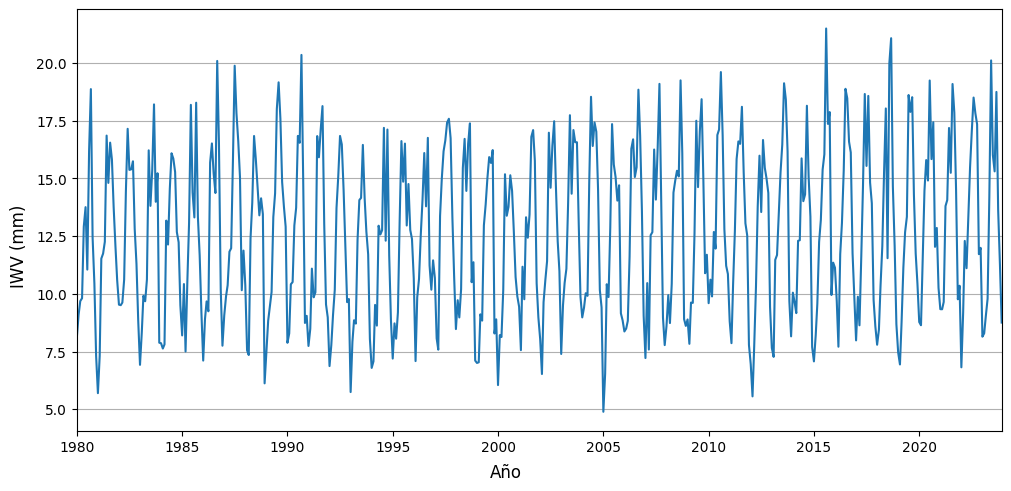

In [4]:
#Creo la gráfica de la evolución del vapor de agua en los útimos 40 años
import datetime

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(df.Date, df.TQV)
#ax.scatter(df.Date, df.TQV)
ax.set_xlim([datetime.date(1980, 1, 1), datetime.date(2023, 12, 1)])

ax.grid(True, which='major', axis='y')

fig.set_figwidth(10)
fig.supxlabel('Año')
fig.supylabel('IWV (mm)')

plt.savefig('Evolucion mensual vapor de agua 40.pdf', format='pdf')
plt.savefig('Evolucion mensual vapor de agua 40.png', format='png')
plt.show()

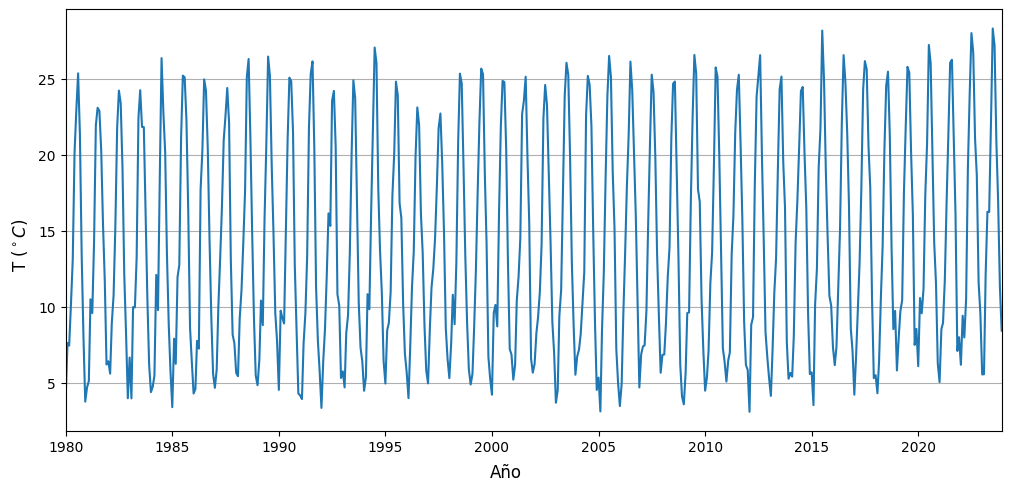

In [5]:
#Creo la gráfica de la evolución de la temperatura en los útimos 40 años

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(df.Date, df.T10M)
#ax.scatter(df.Date, df.T10M)

ax.set_xlim([datetime.date(1980, 1, 1), datetime.date(2023, 12, 1)])

ax.grid(True, which='major', axis='y')

fig.set_figwidth(10)
fig.supxlabel('Año')
fig.supylabel(r'T ($^\circ C$)')

'''plt.savefig('Evolucion mensual temperatura 40.pdf', format='pdf')
plt.savefig('Evolucion mensual temperatura 40.png', format='png')'''
plt.show()

Hago un scatter plot de la temperatura frente al vapor de agua

In [6]:
series

,TQV,T10M
Date,,
"Jan 1, 1980",8.093,277.145
"Feb 1, 1980",9.092,280.753
"Mar 1, 1980",9.686,280.589
"Apr 1, 1980",9.810,283.378
"May 1, 1980",12.912,286.249
...,...,...
"Aug 1, 2023",15.303,300.379
"Sep 1, 2023",18.743,294.075
"Oct 1, 2023",13.642,290.168


In [7]:
fechas_40 = df.iloc[:,0]

fechas_40_vector = {'Año' : fechas_40.dt.year,
                    'Mes' : fechas_40.dt.month,
                    'Dia' : fechas_40.dt.day,
                    'TQV' : df.iloc[:,1],
                    'T10M' : df.iloc[:,2]}

f_40 = pd.DataFrame(fechas_40_vector)

f_40

,Año,Mes,Dia,TQV,T10M
0,1980,1,1,8.093,3.995
1,1980,2,1,9.092,7.603
2,1980,3,1,9.686,7.439
3,1980,4,1,9.810,10.228
4,1980,5,1,12.912,13.099
...,...,...,...,...,...
523,2023,8,1,15.303,27.229
524,2023,9,1,18.743,20.925
525,2023,10,1,13.642,17.018
526,2023,11,1,11.270,11.271


In [8]:
#Calculo la media de los 40 años
media_40 = f_40['TQV'].mean()
media_40_T = f_40['T10M'].mean()
print(f'Media vapor: {media_40}, media temperatura: {media_40_T}')

#Calculo la media anual de los 40 años
anual_40 = f_40.groupby('Año').mean()

anual_40 = anual_40.reset_index()

def combine_columns(row):
    return str(row['Año']) + str(row['Mes']) + str(row['Dia'])

anual_40['Combined'] = anual_40.apply(combine_columns, axis=1)

anual_40['Combined'] = pd.to_datetime(anual_40['Combined'], format='%Y.0%m.5%d.0')

Media vapor: 12.564609848484848, media temperatura: 13.979426136363658


In [9]:
#Añado una columna con la diferencia de la media anual con la de los 40 años del vapor de agua
anual_40.insert(6, 'dif', anual_40['TQV'] - media_40)

anual_40.head(5)

,Año,Mes,Dia,TQV,T10M,Combined,dif
0,1980,6.5,1.0,11.636750,13.114583,1980-06-01,-0.927860
1,1981,6.5,1.0,12.414667,13.814917,1981-06-01,-0.149943
2,1982,6.5,1.0,12.523667,13.308250,1982-06-01,-0.040943
3,1983,6.5,1.0,12.178833,13.935333,1983-06-01,-0.385777
4,1984,6.5,1.0,12.065583,12.714500,1984-06-01,-0.499027


In [10]:
#Añado una columna con la diferencia de la media anual con la de los 40 años de la temperatura
anual_40.insert(7, 'dif_T10M', anual_40['T10M'] - media_40_T)

anual_40.head(5)

,Año,Mes,Dia,TQV,T10M,Combined,dif,dif_T10M
0,1980,6.5,1.0,11.636750,13.114583,1980-06-01,-0.927860,-0.864843
1,1981,6.5,1.0,12.414667,13.814917,1981-06-01,-0.149943,-0.164509
2,1982,6.5,1.0,12.523667,13.308250,1982-06-01,-0.040943,-0.671176
3,1983,6.5,1.0,12.178833,13.935333,1983-06-01,-0.385777,-0.044093
4,1984,6.5,1.0,12.065583,12.714500,1984-06-01,-0.499027,-1.264926


Obtengo las gráficas de las anomalías

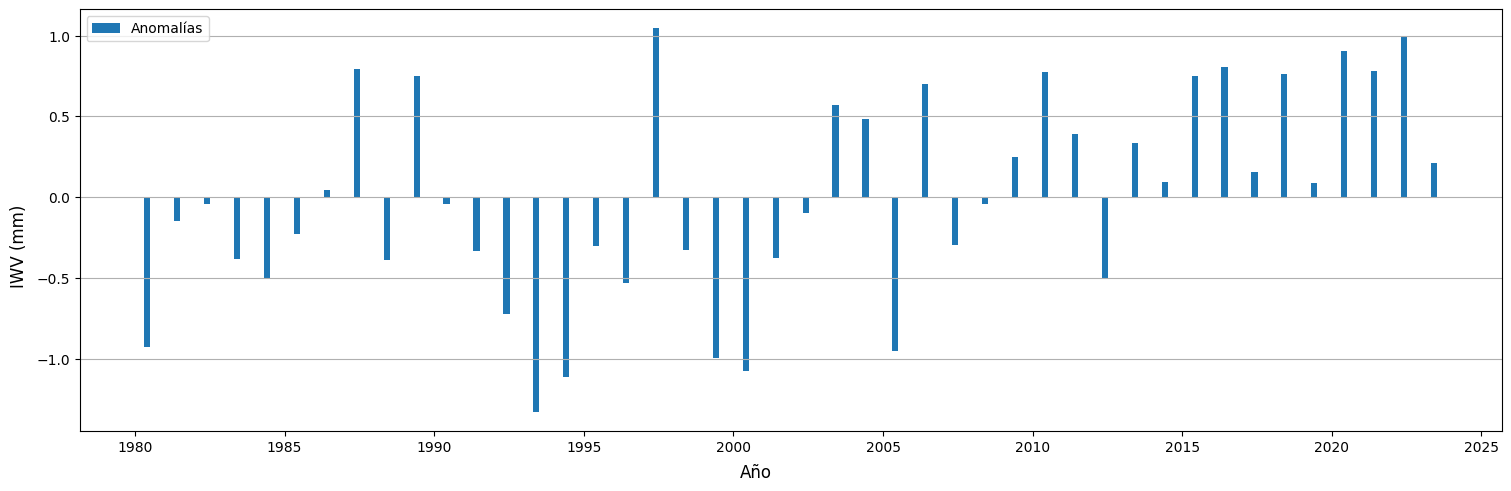

In [11]:
#Creo la gráfica de anomalías del vapor de agua

fig, ax = plt.subplots(constrained_layout=True)

ax.bar(anual_40.Combined, anual_40.dif, width=75, label='Anomalías')

ax.grid(True, which='major', axis='y')

ax.legend(loc='upper left')

fig.set_figwidth(15)
fig.supxlabel('Año')
fig.supylabel('IWV (mm)')

'''plt.savefig('Anomalias vapor de agua en barras 40.pdf', format='pdf')
plt.savefig('Anomalias vapor de agua en barras 40.png', format='png')'''
plt.show()

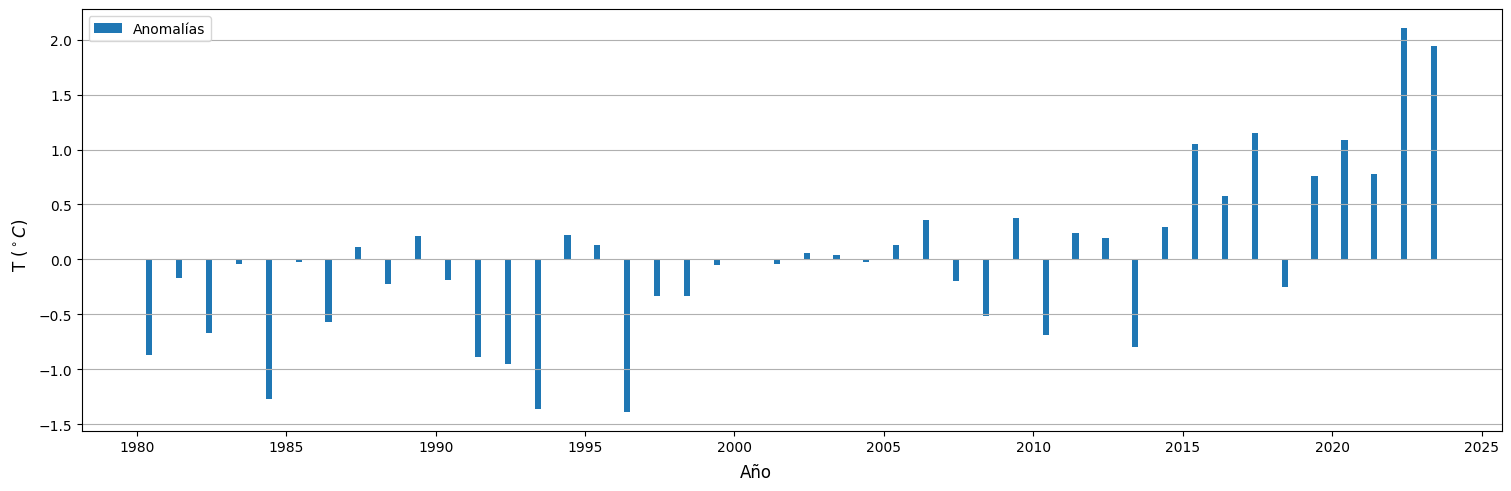

In [12]:
#Creo la gráfica de anomalías de la temperatura

fig, ax = plt.subplots(constrained_layout=True)

ax.bar(anual_40.Combined, anual_40.dif_T10M, width=75, label='Anomalías')

ax.grid(True, which='major', axis='y')

ax.legend(loc='upper left')

fig.set_figwidth(15)
fig.supxlabel('Año')
fig.supylabel(r'T ($^\circ C$)')

'''plt.savefig('Anomalias temperatura en barras 40.pdf', format='pdf')
plt.savefig('Anomalias temperatura en barras 40.png', format='png')'''
plt.show()

Ahora junto las anomalías en una misma gráfica

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\2788576433.py:28: UserWarning: The figure layout has changed to tight
  fig.tight_layout()  # otherwise the right y-label is slightly clipped


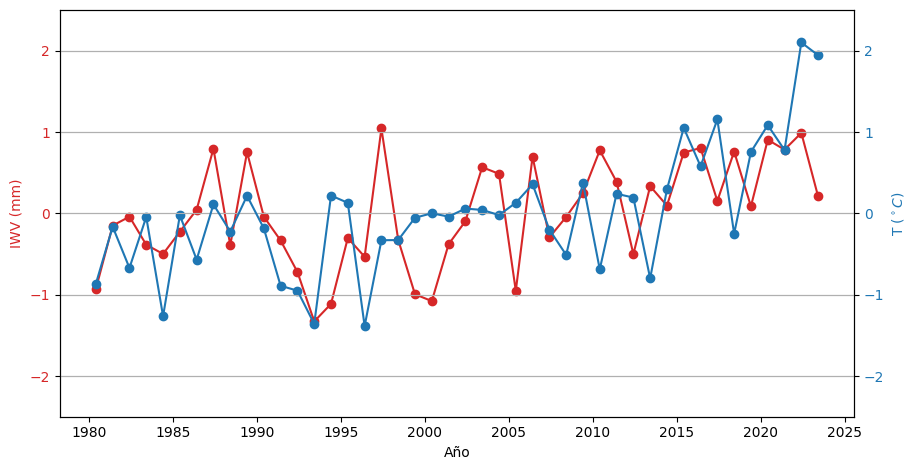

In [13]:
fig, ax1 = plt.subplots(constrained_layout=True)

#Pongo los ejes y ploteo los datos
color1 = 'tab:red'
ax1.set_xlabel('Año')
ax1.set_ylabel('IWV (mm)', color=color1)
ax1.plot(anual_40.Combined, anual_40.dif, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, which='major', axis='y')
ax1.set_ylim(-2.5, 2.5)

ax1.scatter(anual_40.Combined, anual_40.dif, color=color1)

#ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#Coloco los ejes y ploteo los datos
color2 = 'tab:blue'
ax2.set_ylabel(r'T ($^\circ C$)', color=color2)  # we already handled the x-label with ax1
ax2.plot(anual_40.Combined, anual_40.dif_T10M, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(True, which='major', axis='y')
ax2.set_ylim(-2.5, 2.5)

ax2.scatter(anual_40.Combined, anual_40.dif_T10M, color=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_figwidth(10)
#fig.legend(loc='upper left')

plt.savefig('Anomalias vapor de agua y temperatura 40.pdf', format='pdf')
plt.savefig('Anomalias vapor de agua y temperatura 40.png', format='png')
plt.show()

Obtengo las gráficas de evolución anual de los últimos 40 años

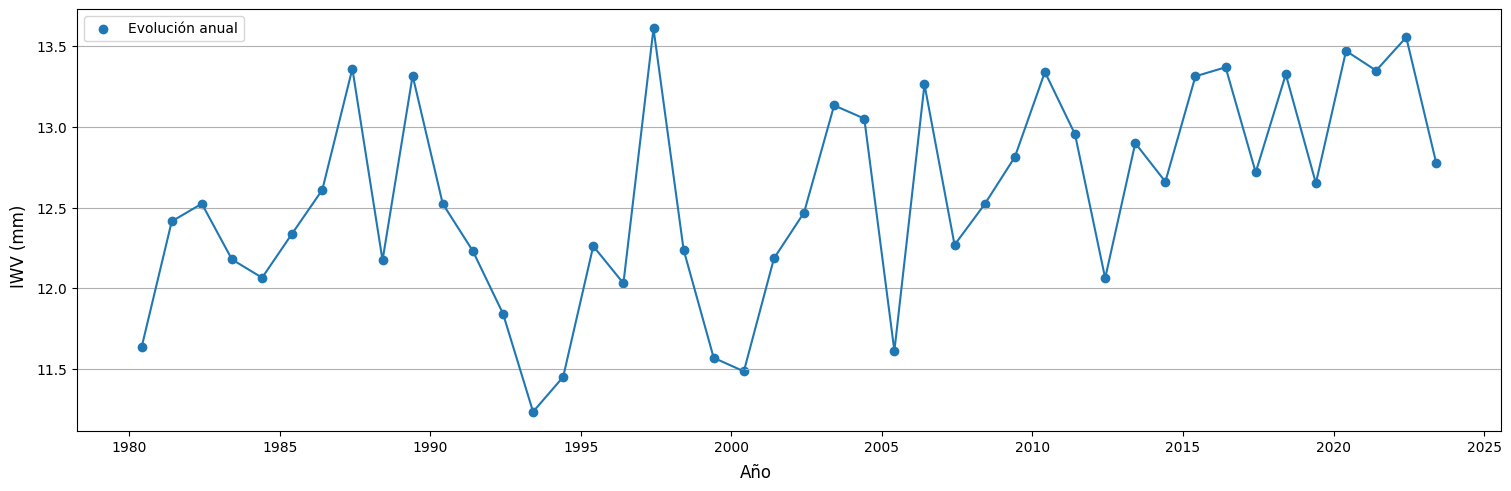

In [14]:
#Creo la gráfica de la evolución anual del vapor de agua en los útimos 40 años

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(anual_40.Combined, anual_40.TQV)
ax.scatter(anual_40.Combined, anual_40.TQV, label='Evolución anual')

ax.grid(True, which='major', axis='y')

ax.legend(loc='upper left')

fig.set_figwidth(15)
fig.supxlabel('Año')
fig.supylabel('IWV (mm)')

'''plt.savefig('Evolucion anual vapor de agua 40.pdf', format='pdf')
plt.savefig('Evolucion anual vapor de agua 40.pdf', format='pdf')'''
plt.show()

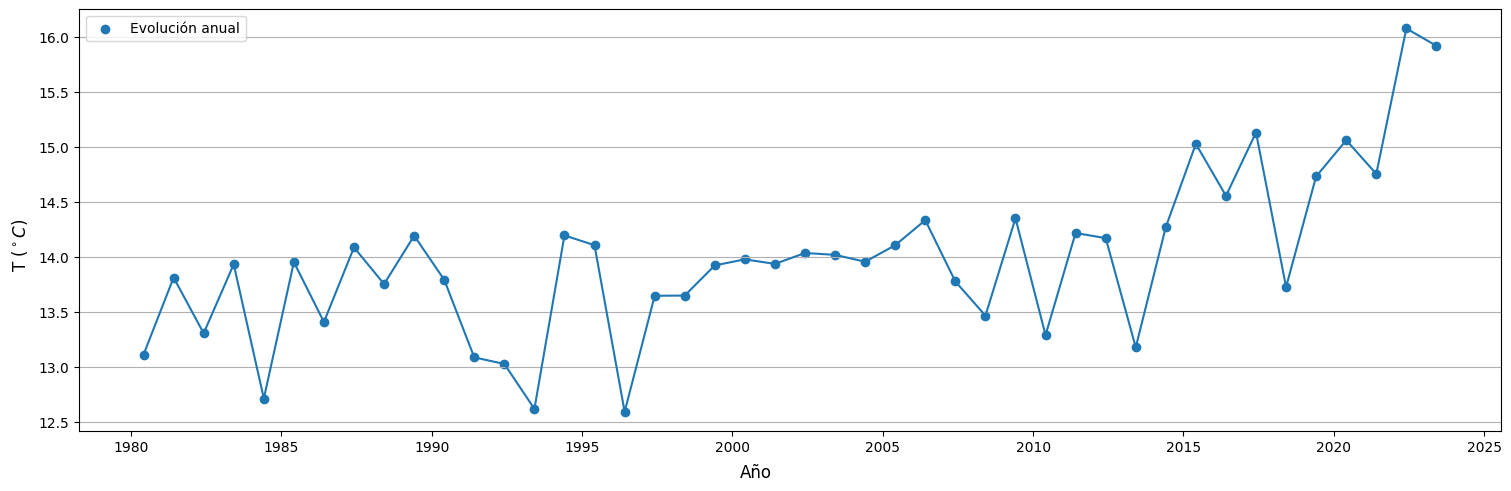

In [15]:
#Creo la gráfica de la evolución anual de la temperatura en los útimos 40 años

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(anual_40.Combined, anual_40.T10M)
ax.scatter(anual_40.Combined, anual_40.T10M, label='Evolución anual')

ax.grid(True, which='major', axis='y')

ax.legend(loc='upper left')

fig.set_figwidth(15)
fig.supxlabel('Año')
fig.supylabel(r'T ($^\circ C$)')

'''plt.savefig('Evolucion anual temperatura 40.pdf', format='pdf')
plt.savefig('Evolucion anual temperatura 40.png', format='png')'''
plt.show()

Obtengo las mismas gráficas pero ahora como en histograma

In [16]:
'''#Creo la gráfica de barras de la evolución anual del vapor de agua en los útimos 40 años

fig, ax = plt.subplots(constrained_layout=True)

ax.bar(anual_40.Combined, anual_40.TQV, width=300)

#ax.grid(True, which='major', axis='y')

fig.set_figwidth(15)
fig.supxlabel('Año')
fig.supylabel('IWV')
plt.show()'''

"#Creo la gráfica de barras de la evolución anual del vapor de agua en los útimos 40 años\n\nfig, ax = plt.subplots(constrained_layout=True)\n\nax.bar(anual_40.Combined, anual_40.TQV, width=300)\n\n#ax.grid(True, which='major', axis='y')\n\nfig.set_figwidth(15)\nfig.supxlabel('Año')\nfig.supylabel('IWV')\nplt.show()"

In [17]:
'''#Creo la gráfica de barras de la evolución anual de la temperatura en los útimos 40 años

fig, ax = plt.subplots(constrained_layout=True)

ax.bar(anual_40.Combined, anual_40.T10M, width=300)

#ax.grid(True, which='major', axis='y')

fig.set_figwidth(15)
fig.supxlabel('Año')
fig.supylabel('T (K)')
plt.show()'''

"#Creo la gráfica de barras de la evolución anual de la temperatura en los útimos 40 años\n\nfig, ax = plt.subplots(constrained_layout=True)\n\nax.bar(anual_40.Combined, anual_40.T10M, width=300)\n\n#ax.grid(True, which='major', axis='y')\n\nfig.set_figwidth(15)\nfig.supxlabel('Año')\nfig.supylabel('T (K)')\nplt.show()"

Ahora con boxplot

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\3104514891.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


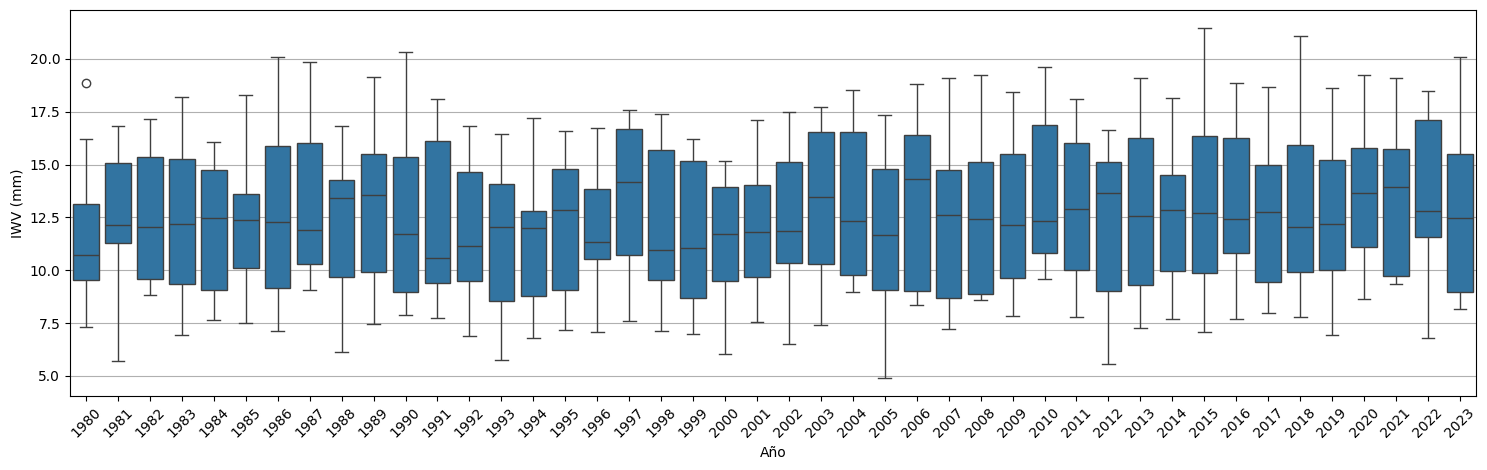

In [18]:
fig, ax = plt.subplots()

sbs.boxplot(data=f_40, x = 'Año', y = 'TQV')

ax.grid(True, which='major', axis='y')

ax.set(ylabel='IWV (mm)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

plt.tight_layout()
plt.savefig('Evolucion anual vapor de agua 40 en boxplot.pdf', format='pdf')
plt.savefig('Evolucion anual vapor de agua 40 en boxplot.png', format='png')

plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\905305233.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


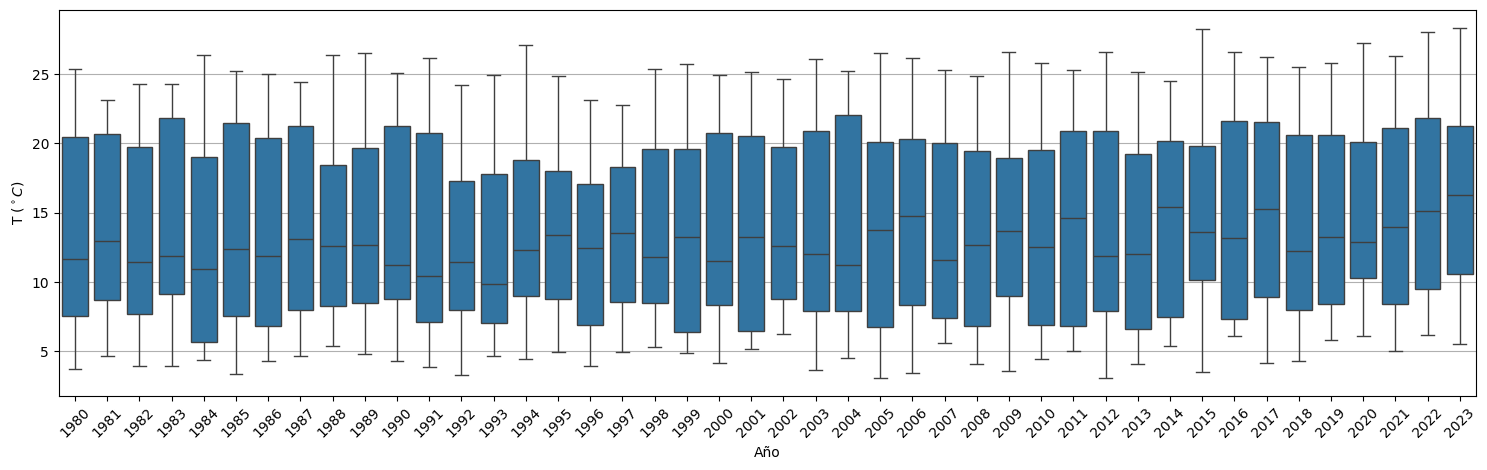

In [19]:
fig, ax = plt.subplots()

sbs.boxplot(data=f_40, x = 'Año', y = 'T10M')

ax.grid(True, which='major', axis='y')

ax.set(ylabel=r'T ($^\circ C$)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

plt.tight_layout()
'''plt.savefig('Evolucion anual temperatura 40 en boxplot.pdf', format='pdf')
plt.savefig('Evolucion anual temperatura 40 en boxplot.png', format='png')'''
plt.show()

Añado ahora una línea donde se muestra la media anual

In [20]:
'''fig, ax = plt.subplots()

sbs.boxplot(data=f_40, x = 'Año', y = 'TQV')

sbs.lineplot(data=anual_40, x = 'Combined', y = 'TQV', color='black')
sbs.scatterplot(data=anual_40, x = 'Combined', y = 'TQV', label='Media anual', color='black')

ax.grid(True, which='major', axis='y')

ax.set(ylabel='IWV')
ax.set_xticklabels(f_40['Año'], rotation=45)

fig.set_figwidth(15)

plt.savefig('Evolucion anual vapor de agua 40 en boxplot con media anual.pdf', format='pdf')
plt.show()'''

"fig, ax = plt.subplots()\n\nsbs.boxplot(data=f_40, x = 'Año', y = 'TQV')\n\nsbs.lineplot(data=anual_40, x = 'Combined', y = 'TQV', color='black')\nsbs.scatterplot(data=anual_40, x = 'Combined', y = 'TQV', label='Media anual', color='black')\n\nax.grid(True, which='major', axis='y')\n\nax.set(ylabel='IWV')\nax.set_xticklabels(f_40['Año'], rotation=45)\n\nfig.set_figwidth(15)\n\nplt.savefig('Evolucion anual vapor de agua 40 en boxplot con media anual.pdf', format='pdf')\nplt.show()"

In [21]:
'''fig, ax = plt.subplots()

sbs.boxplot(data=f_40, x = 'Año', y = 'TQV')

ax.plot(anual_40.Combined, anual_40.T10M, color='black')
ax.scatter(anual_40.Combined, anual_40.T10M, label='Media mensual', color='black')

ax.grid(True, which='major', axis='y')

ax.set(ylabel='IWV')
ax.set_xticklabels(f_40['Año'], rotation=45)

fig.set_figwidth(15)

plt.savefig('Evolucion anual temperatura 40 en boxplot con media anual.pdf', format='pdf')
plt.show()'''

"fig, ax = plt.subplots()\n\nsbs.boxplot(data=f_40, x = 'Año', y = 'TQV')\n\nax.plot(anual_40.Combined, anual_40.T10M, color='black')\nax.scatter(anual_40.Combined, anual_40.T10M, label='Media mensual', color='black')\n\nax.grid(True, which='major', axis='y')\n\nax.set(ylabel='IWV')\nax.set_xticklabels(f_40['Año'], rotation=45)\n\nfig.set_figwidth(15)\n\nplt.savefig('Evolucion anual temperatura 40 en boxplot con media anual.pdf', format='pdf')\nplt.show()"

Igual con los últimos 30 años

In [22]:
ultimos_30 = anual_40.tail(31)

ultimos_30.head(5)

,Año,Mes,Dia,TQV,T10M,Combined,dif,dif_T10M
13,1993,6.5,1.0,11.235917,12.620417,1993-06-01,-1.328693,-1.359009
14,1994,6.5,1.0,11.451500,14.198500,1994-06-01,-1.113110,0.219074
15,1995,6.5,1.0,12.261333,14.109083,1995-06-01,-0.303277,0.129657
16,1996,6.5,1.0,12.031250,12.594083,1996-06-01,-0.533360,-1.385343
17,1997,6.5,1.0,13.608083,13.649083,1997-06-01,1.043473,-0.330343


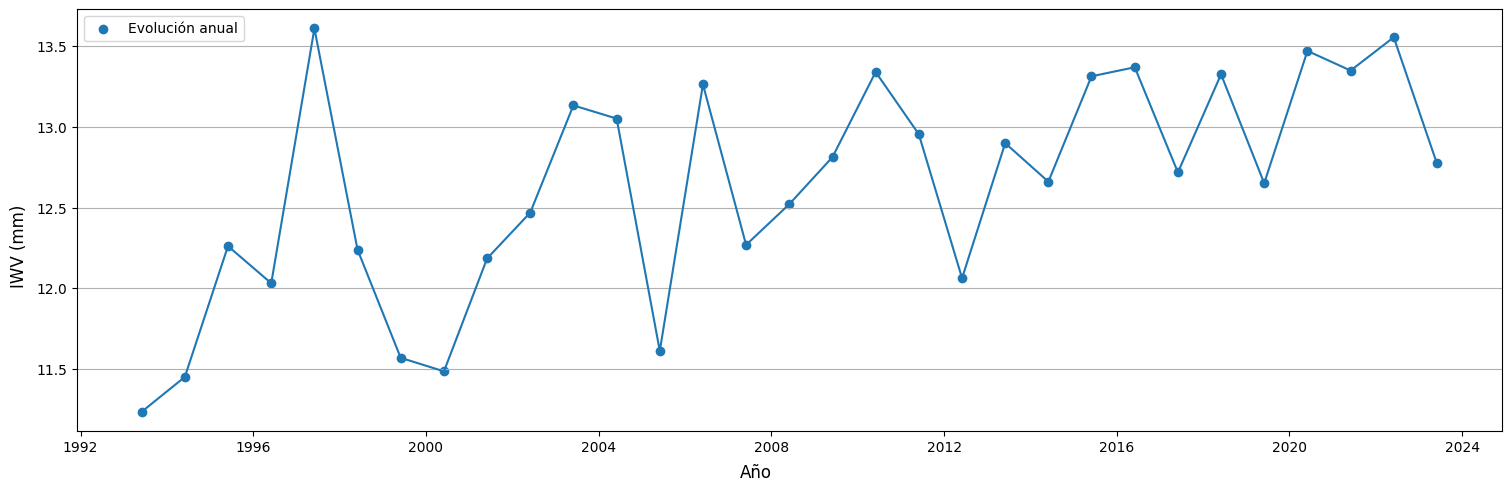

In [23]:
#Creo la gráfica de la evolución anual del vapor de agua en los útimos 30 años

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(ultimos_30.Combined, ultimos_30.TQV)
ax.scatter(ultimos_30.Combined, ultimos_30.TQV, label='Evolución anual')

ax.grid(True, which='major', axis='y')

ax.legend(loc='upper left')

fig.set_figwidth(15)
fig.supxlabel('Año')
fig.supylabel('IWV (mm)')

'''plt.savefig('Evolucion anual vapor de agua 30.pdf', format='pdf')
plt.savefig('Evolucion anual vapor de agua 30.png', format='png')'''
plt.show()

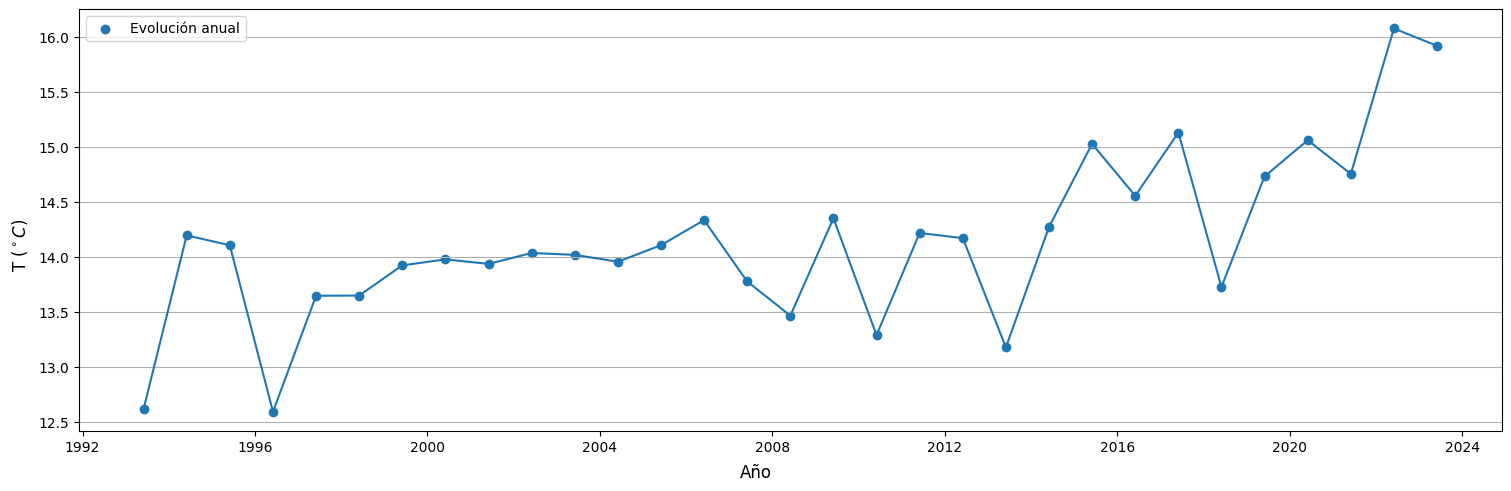

In [24]:
#Creo la gráfica de la evolución anual de la temperatura en los útimos 30 años

fig, ax = plt.subplots(constrained_layout=True)

ax.plot(ultimos_30.Combined, ultimos_30.T10M)
ax.scatter(ultimos_30.Combined, ultimos_30.T10M, label='Evolución anual')

ax.grid(True, which='major', axis='y')

ax.legend(loc='upper left')

fig.set_figwidth(15)
fig.supxlabel('Año')
fig.supylabel(r'T ($^\circ C$)')

'''plt.savefig('Evolucion anual temperatura 30.pdf', format='pdf')
plt.savefig('Evolucion anual temperatura 30.png', format='png')'''
plt.show()

Obtengo ahora los gráficos de barras

In [25]:
'''#Creo la gráfica de barras de la evolución anual del vapor de agua en los útimos 30 años

fig, ax = plt.subplots(constrained_layout=True)

ax.bar(ultimos_30.Combined, ultimos_30.TQV, width=300)

ax.grid(True, which='major', axis='y')

fig.set_figwidth(15)
fig.supxlabel('Año')
fig.supylabel('IWV')
plt.show()'''

"#Creo la gráfica de barras de la evolución anual del vapor de agua en los útimos 30 años\n\nfig, ax = plt.subplots(constrained_layout=True)\n\nax.bar(ultimos_30.Combined, ultimos_30.TQV, width=300)\n\nax.grid(True, which='major', axis='y')\n\nfig.set_figwidth(15)\nfig.supxlabel('Año')\nfig.supylabel('IWV')\nplt.show()"

In [26]:
'''#Creo la gráfica de barras de la evolución anual de la temperatura en los útimos 30 años

fig, ax = plt.subplots(constrained_layout=True)

ax.bar(ultimos_30.Combined, ultimos_30.T10M, width=300)

#ax.grid(True, which='major', axis='y')

fig.set_figwidth(15)
fig.supxlabel('Año')
fig.supylabel('T (K)')
plt.show()'''

"#Creo la gráfica de barras de la evolución anual de la temperatura en los útimos 30 años\n\nfig, ax = plt.subplots(constrained_layout=True)\n\nax.bar(ultimos_30.Combined, ultimos_30.T10M, width=300)\n\n#ax.grid(True, which='major', axis='y')\n\nfig.set_figwidth(15)\nfig.supxlabel('Año')\nfig.supylabel('T (K)')\nplt.show()"

Ahora boxplot

Tengo que rehacer estas gráficas, necesito un DataFrame con todos los datos, no directamente con las medias anuales

In [27]:
df_30 = f_40

f_30 = df_30.loc[(df_30.Año >= 1993.0)]

In [28]:
f_30

,Año,Mes,Dia,TQV,T10M
156,1993,1,1,5.748,5.741
157,1993,2,1,7.921,4.681
158,1993,3,1,8.857,8.257
159,1993,4,1,8.711,9.456
160,1993,5,1,12.344,13.509
...,...,...,...,...,...
523,2023,8,1,15.303,27.229
524,2023,9,1,18.743,20.925
525,2023,10,1,13.642,17.018
526,2023,11,1,11.270,11.271


C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\2125783355.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


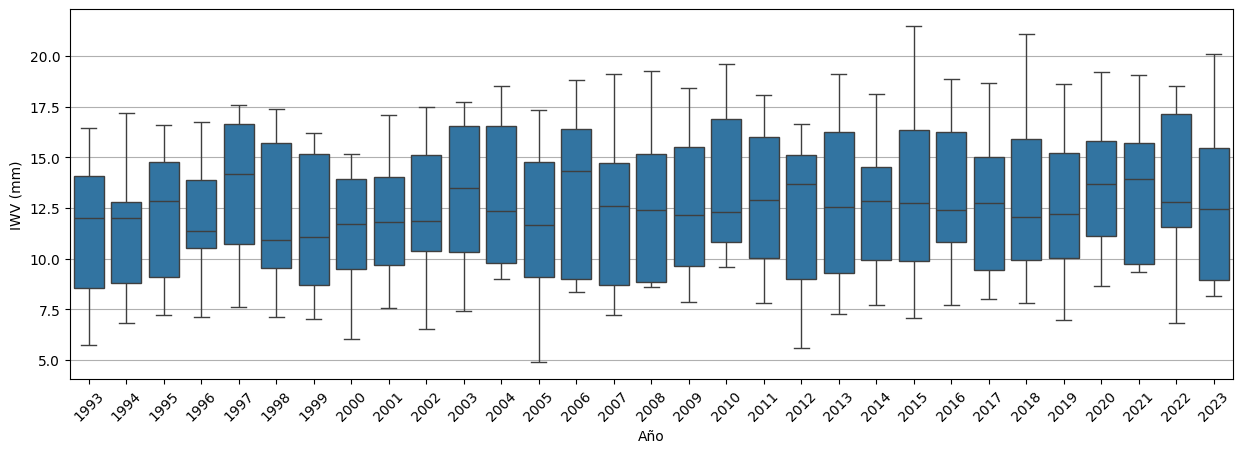

In [29]:
fig, ax = plt.subplots()

sbs.boxplot(data=f_30, x = 'Año', y = 'TQV')

ax.grid(True, which='major', axis='y')

ax.set(ylabel='IWV (mm)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

'''plt.savefig('Evolucion anual vapor de agua 30 en boxplot.pdf', format='pdf')
plt.savefig('Evolucion anual vapor de agua 30 en boxplot.png', format='png')'''
plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\1577711702.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


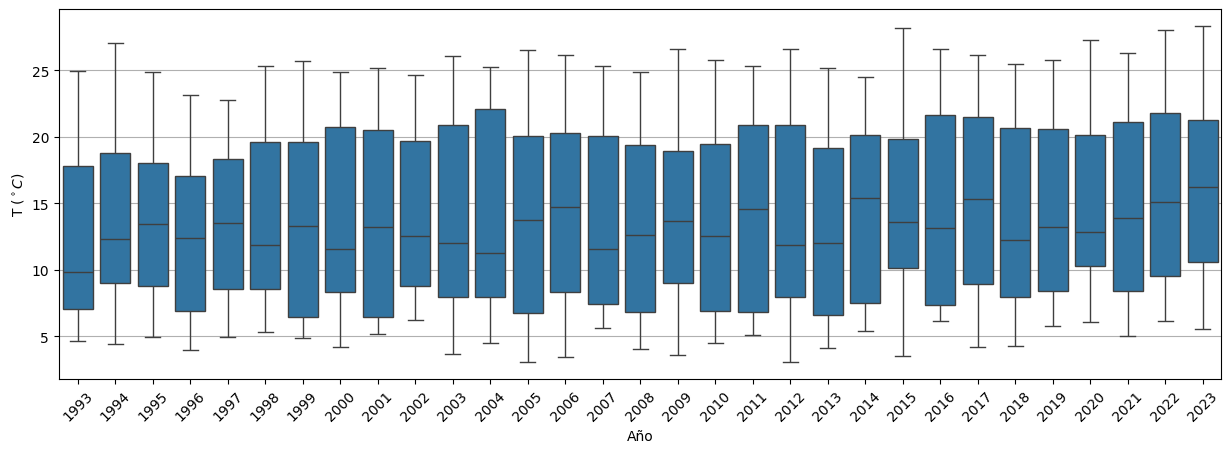

In [30]:
fig, ax = plt.subplots()

sbs.boxplot(data=f_30, x = 'Año', y = 'T10M')

ax.grid(True, which='major', axis='y')

ax.set(ylabel=r'T ($^\circ C$)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

'''plt.savefig('Evolucion anual temperatura 30 en boxplot.pdf', format='pdf')
plt.savefig('Evolucion anual temperatura 30 en boxplot.png', format='png')'''
plt.show()

In [31]:
'''fig, ax = plt.subplots()

sbs.boxplot(data=f_30, x = 'Año', y = 'TQV')

ax.plot(ultimos_30.Combined, ultimos_30.TQV, color='black')
ax.scatter(ultimos_30.Combined, ultimos_30.TQV, label='Media anual', color='black')

ax.grid(True, which='major', axis='y')

ax.set(ylabel='IWV')
ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(15)

plt.savefig('Evolucion anual vapor de agua 30 en boxplot con media anual.pdf', format='pdf')
plt.savefig('Evolucion anual vapor de agua 30 en boxplot con media anual.pdf', format='pdf')
plt.show()'''

"fig, ax = plt.subplots()\n\nsbs.boxplot(data=f_30, x = 'Año', y = 'TQV')\n\nax.plot(ultimos_30.Combined, ultimos_30.TQV, color='black')\nax.scatter(ultimos_30.Combined, ultimos_30.TQV, label='Media anual', color='black')\n\nax.grid(True, which='major', axis='y')\n\nax.set(ylabel='IWV')\nax.set_xticklabels(f_30['Año'], rotation=45)\n\nfig.set_figwidth(15)\n\nplt.savefig('Evolucion anual vapor de agua 30 en boxplot con media anual.pdf', format='pdf')\nplt.savefig('Evolucion anual vapor de agua 30 en boxplot con media anual.pdf', format='pdf')\nplt.show()"

In [32]:
'''fig, ax = plt.subplots()

sbs.boxplot(data=f_30, x = 'Año', y = 'T10M')

ax.plot(ultimos_30.Combined, ultimos_30.T10M, color='black')
ax.scatter(ultimos_30.Combined, ultimos_30.T10M, label='Evolución anual', color='black')

ax.grid(True, which='major', axis='y')

ax.set(ylabel='T (K)')
ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(15)
plt.savefig('Evolucion anual temperatura 30 en boxplot con media anual.pdf', format='pdf')
plt.show()'''

"fig, ax = plt.subplots()\n\nsbs.boxplot(data=f_30, x = 'Año', y = 'T10M')\n\nax.plot(ultimos_30.Combined, ultimos_30.T10M, color='black')\nax.scatter(ultimos_30.Combined, ultimos_30.T10M, label='Evolución anual', color='black')\n\nax.grid(True, which='major', axis='y')\n\nax.set(ylabel='T (K)')\nax.set_xticklabels(f_30['Año'], rotation=45)\n\nfig.set_figwidth(15)\nplt.savefig('Evolucion anual temperatura 30 en boxplot con media anual.pdf', format='pdf')\nplt.show()"

Ahora las anomalías de los últimos 30 años

In [33]:
#Añado una columna con la diferencia de la media anual con la de los 40 años del vapor de agua
media_30 = ultimos_30['TQV'].mean()

ultimos_30.insert(8, 'dif_30', ultimos_30['TQV'] - media_30)

ultimos_30.head(5)

,Año,Mes,Dia,TQV,T10M,Combined,dif,dif_T10M,dif_30
13,1993,6.5,1.0,11.235917,12.620417,1993-06-01,-1.328693,-1.359009,-1.397210
14,1994,6.5,1.0,11.451500,14.198500,1994-06-01,-1.113110,0.219074,-1.181626
15,1995,6.5,1.0,12.261333,14.109083,1995-06-01,-0.303277,0.129657,-0.371793
16,1996,6.5,1.0,12.031250,12.594083,1996-06-01,-0.533360,-1.385343,-0.601876
17,1997,6.5,1.0,13.608083,13.649083,1997-06-01,1.043473,-0.330343,0.974957


In [34]:
#Añado una columna con la diferencia de la media anual con la de los 40 años de la temperatura
media_30_T = ultimos_30['T10M'].mean()

ultimos_30.insert(9, 'dif_T10M_30', ultimos_30['T10M'] - media_30_T)

ultimos_30.head(5)

,Año,Mes,Dia,TQV,T10M,Combined,dif,dif_T10M,dif_30,dif_T10M_30
13,1993,6.5,1.0,11.235917,12.620417,1993-06-01,-1.328693,-1.359009,-1.397210,-1.537215
14,1994,6.5,1.0,11.451500,14.198500,1994-06-01,-1.113110,0.219074,-1.181626,0.040868
15,1995,6.5,1.0,12.261333,14.109083,1995-06-01,-0.303277,0.129657,-0.371793,-0.048548
16,1996,6.5,1.0,12.031250,12.594083,1996-06-01,-0.533360,-1.385343,-0.601876,-1.563548
17,1997,6.5,1.0,13.608083,13.649083,1997-06-01,1.043473,-0.330343,0.974957,-0.508548


C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\2082538263.py:28: UserWarning: The figure layout has changed to tight
  fig.tight_layout()  # otherwise the right y-label is slightly clipped


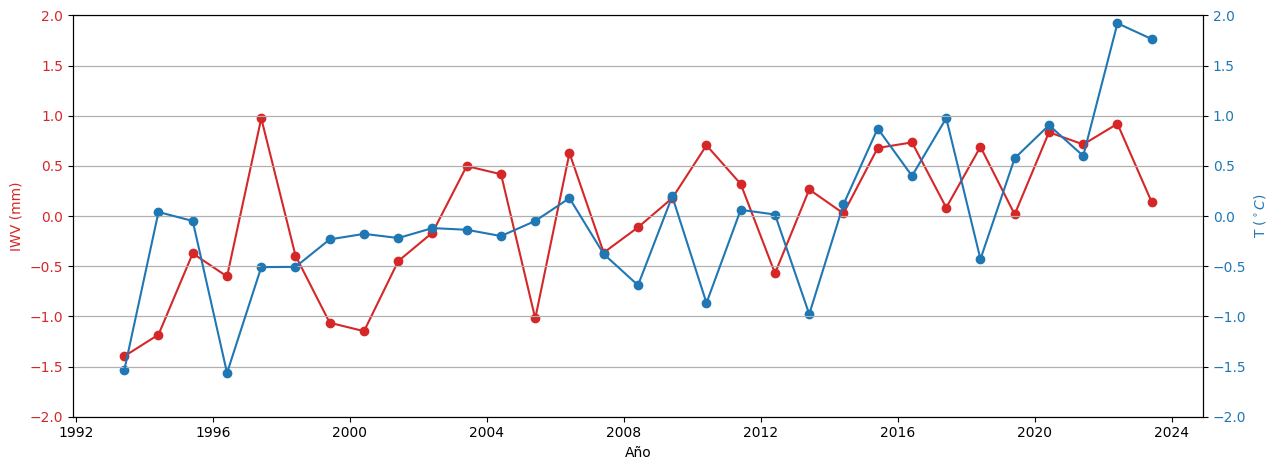

In [35]:
fig, ax1 = plt.subplots(constrained_layout=True)

#Pongo los ejes y ploteo los datos
color1 = 'tab:red'
ax1.set_xlabel('Año')
ax1.set_ylabel('IWV (mm)', color=color1)
ax1.plot(ultimos_30.Combined, ultimos_30.dif_30, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, which='major', axis='y')
ax1.set_ylim(-2, 2)

ax1.scatter(ultimos_30.Combined, ultimos_30.dif_30, color=color1)

#ax1.legend(loc='upper left')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#Coloco los ejes y ploteo los datos
color2 = 'tab:blue'
ax2.set_ylabel(r'T ($^\circ C$)', color=color2)  # we already handled the x-label with ax1
ax2.plot(ultimos_30.Combined, ultimos_30.dif_T10M_30, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(True, which='major', axis='y')
ax2.set_ylim(-2, 2)

ax2.scatter(ultimos_30.Combined, ultimos_30.dif_T10M_30, color=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_figwidth(15)
#fig.legend(loc='upper left')

'''plt.savefig('Anomalias vapor de agua y temperatura 30.pdf', format='pdf')
plt.savefig('Anomalias vapor de agua y temperatura 30.png', format='png')'''
plt.show()

Obtengo una gráfica con las gráficas anteriores juntas (cada una en la fecha que corresponde)

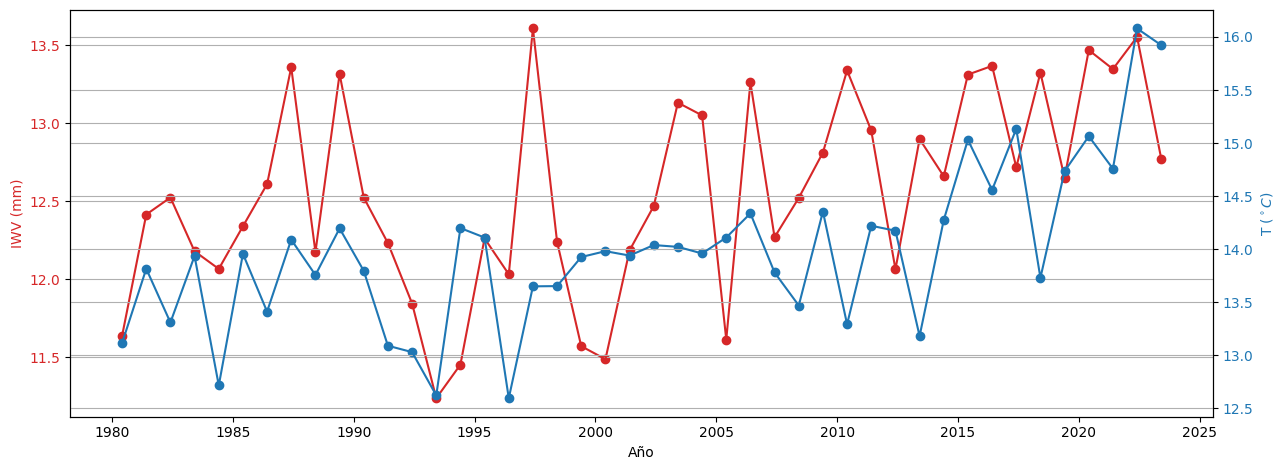

In [36]:
fig, ax1 = plt.subplots()

color1 = 'tab:red'
ax1.set_xlabel('Año')
ax1.set_ylabel('IWV (mm)', color=color1)
ax1.plot(anual_40.Combined, anual_40.TQV, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, which='major', axis='y')

ax1.scatter(anual_40.Combined, anual_40.TQV, color=color1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel(r'T ($^\circ C$)', color=color2)  # we already handled the x-label with ax1
ax2.plot(anual_40.Combined, anual_40.T10M, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(True, which='major', axis='y')

ax2.scatter(anual_40.Combined, anual_40.T10M, color=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_figwidth(15)

'''plt.savefig('Evolucion anual vapor de agua y temperatura 40.pdf', format='pdf')
plt.savefig('Evolucion anual vapor de agua y temperatura 40.png', format='png')'''
plt.show()

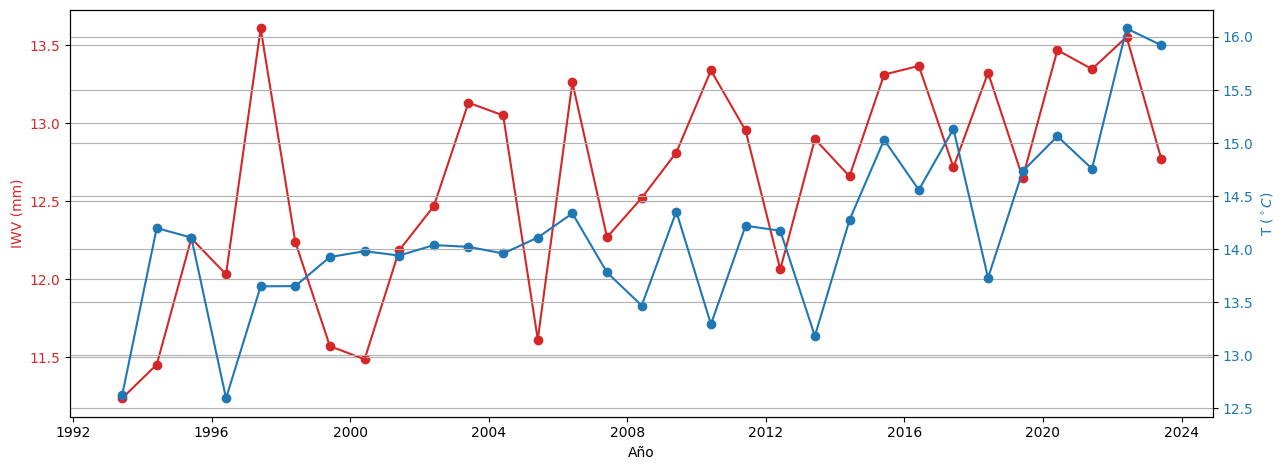

In [37]:
fig, ax1 = plt.subplots()

color1 = 'tab:red'
ax1.set_xlabel('Año')
ax1.set_ylabel('IWV (mm)', color=color1)
ax1.plot(ultimos_30.Combined, ultimos_30.TQV, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, which='major', axis='y')

ax1.scatter(ultimos_30.Combined, ultimos_30.TQV, color=color1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:blue'
ax2.set_ylabel(r'T ($^\circ C$)', color=color2)  # we already handled the x-label with ax1
ax2.plot(ultimos_30.Combined, ultimos_30.T10M, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(True, which='major', axis='y')

ax2.scatter(ultimos_30.Combined, ultimos_30.T10M, color=color2)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_figwidth(15)

'''plt.savefig('Evolucion anual vapor de agua y temperatura 30.pdf', format='pdf')
plt.savefig('Evolucion anual vapor de agua y temperatura 30.png', format='png')'''
plt.show()

Obtengo la imformación de seasonal decompose y la ploteo

In [38]:
f_40['Combined'] = f_40.apply(combine_columns, axis=1)

f_40['Combined'] = pd.to_datetime(f_40['Combined'], format='%Y.0%m.0%d.0')

f_40

,Año,Mes,Dia,TQV,T10M,Combined
0,1980,1,1,8.093,3.995,1980-01-01
1,1980,2,1,9.092,7.603,1980-02-01
2,1980,3,1,9.686,7.439,1980-03-01
3,1980,4,1,9.810,10.228,1980-04-01
4,1980,5,1,12.912,13.099,1980-05-01
...,...,...,...,...,...,...
523,2023,8,1,15.303,27.229,2023-08-01
524,2023,9,1,18.743,20.925,2023-09-01
525,2023,10,1,13.642,17.018,2023-10-01
526,2023,11,1,11.270,11.271,2023-11-01


In [39]:
f_40.set_index('Combined', inplace=True)

In [40]:
result = seasonal_decompose(f_40['TQV'], model='additive', period=12)

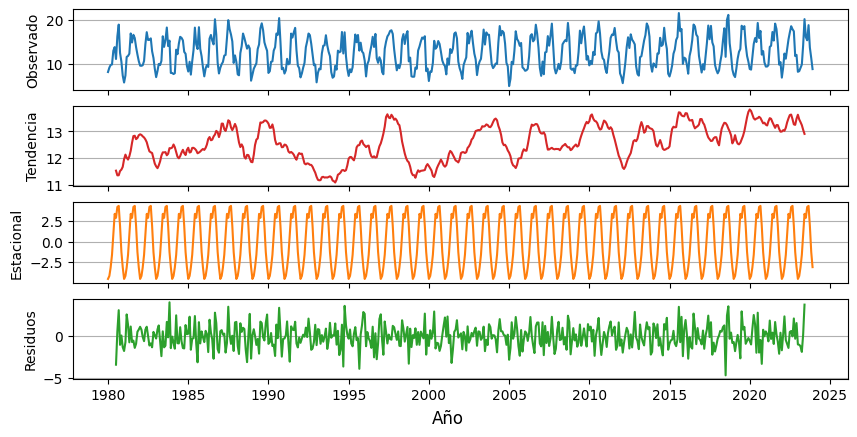

In [41]:
#Obtengo la gráfica con todos los datos que aporta el seasonal decompose

observado = result.observed
tendencia = result.trend
estacional = result.seasonal
residuos = result.resid

fig, ax = plt.subplots(4, sharex=True)

ax[0].plot(observado, color='tab:blue')
ax[0].set_ylabel('Observado')
#ax[0].xaxis.set_major_locator(ticker.MultipleLocator(960))
#ax[0].xaxis.set_minor_locator(ticker.MultipleLocator(192))
ax[0].grid(True, which='major', axis='y')

ax[1].plot(tendencia, color='tab:red')
ax[1].set_ylabel('Tendencia')
ax[1].grid(True, which='major', axis='y')

ax[2].plot(estacional, color='tab:orange')
ax[2].set_ylabel('Estacional')
ax[2].grid(True, which='major', axis='y')

ax[3].plot(residuos, color='tab:green')
ax[3].set_ylabel('Residuos')
ax[3].grid(True, which='major', axis='y')

fig.set_figwidth(10)
fig.supxlabel('Año')

'''plt.savefig('Seasonal decompose vapor de agua 40.pdf', format='pdf')
plt.savefig('Seasonal decompose vapor de agua 40.png', format='png')'''
plt.show()

Igual con la temperatura

In [42]:
result_T = seasonal_decompose(f_40['T10M'], model='additive', period=12)

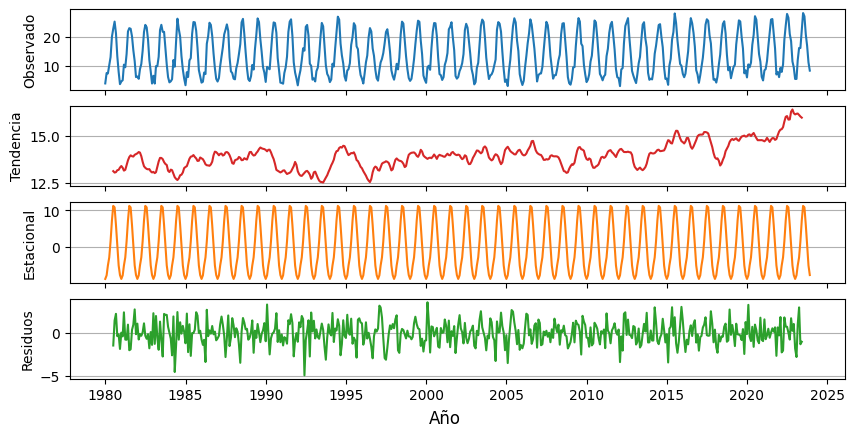

In [43]:
#Obtengo la gráfica con todos los datos que aporta el seasonal decompose de la temperatura

observado_T = result_T.observed
tendencia_T = result_T.trend
estacional_T = result_T.seasonal
residuos_T = result_T.resid

fig, ax = plt.subplots(4, sharex=True)

ax[0].plot(observado_T, color='tab:blue')
ax[0].set_ylabel('Observado')
#ax[0].xaxis.set_major_locator(ticker.MultipleLocator(960))
#ax[0].xaxis.set_minor_locator(ticker.MultipleLocator(192))
ax[0].grid(True, which='major', axis='y')

ax[1].plot(tendencia_T, color='tab:red')
ax[1].set_ylabel('Tendencia')
ax[1].grid(True, which='major', axis='y')

ax[2].plot(estacional_T, color='tab:orange')
ax[2].set_ylabel('Estacional')
ax[2].grid(True, which='major', axis='y')

ax[3].plot(residuos_T, color='tab:green')
ax[3].set_ylabel('Residuos')
ax[3].grid(True, which='major', axis='y')

fig.set_figwidth(10)
fig.supxlabel('Año')

'''plt.savefig('Seasonal decompose temperatura 40.pdf', format='pdf')
plt.savefig('Seasonal decompose temperatura 40.png', format='png')'''
plt.show()

Ahora con los últimos 30 años

In [44]:
f_30['Combined'] = f_30.apply(combine_columns, axis=1)

f_30['Combined'] = pd.to_datetime(f_30['Combined'], format='%Y.0%m.0%d.0')

f_30

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\1450718065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_30['Combined'] = f_30.apply(combine_columns, axis=1)
C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\1450718065.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f_30['Combined'] = pd.to_datetime(f_30['Combined'], format='%Y.0%m.0%d.0')


,Año,Mes,Dia,TQV,T10M,Combined
156,1993,1,1,5.748,5.741,1993-01-01
157,1993,2,1,7.921,4.681,1993-02-01
158,1993,3,1,8.857,8.257,1993-03-01
159,1993,4,1,8.711,9.456,1993-04-01
160,1993,5,1,12.344,13.509,1993-05-01
...,...,...,...,...,...,...
523,2023,8,1,15.303,27.229,2023-08-01
524,2023,9,1,18.743,20.925,2023-09-01
525,2023,10,1,13.642,17.018,2023-10-01
526,2023,11,1,11.270,11.271,2023-11-01


In [45]:
f_30.set_index('Combined', inplace=True)

In [46]:
result_30 = seasonal_decompose(f_30['TQV'], model='additive', period=12)

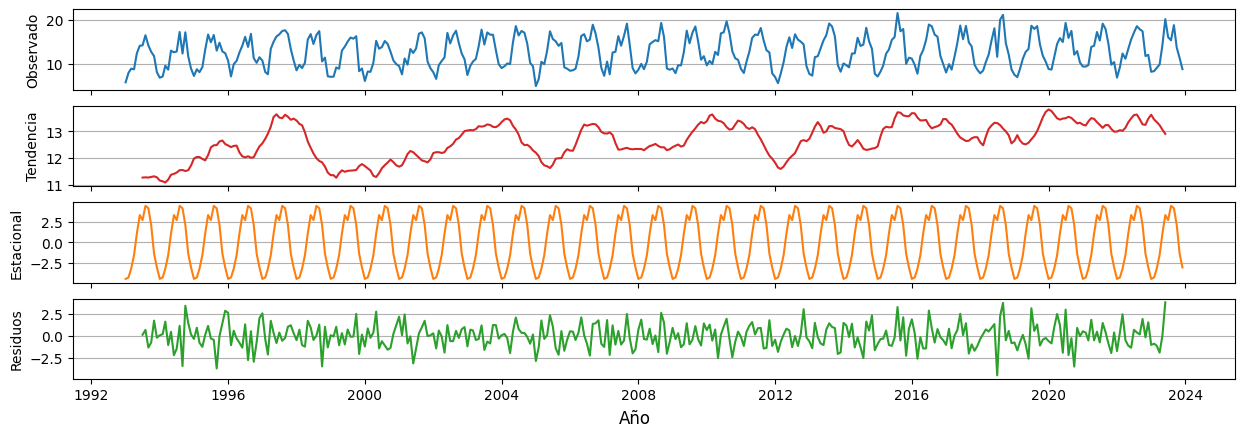

In [47]:
#Obtengo la gráfica con todos los datos que aporta el seasonal decompose de la temperatura

observado_30 = result_30.observed
tendencia_30 = result_30.trend
estacional_30 = result_30.seasonal
residuos_30 = result_30.resid

fig, ax = plt.subplots(4, sharex=True)

ax[0].plot(observado_30, color='tab:blue')
ax[0].set_ylabel('Observado')
#ax[0].xaxis.set_major_locator(ticker.MultipleLocator(960))
#ax[0].xaxis.set_minor_locator(ticker.MultipleLocator(192))
ax[0].grid(True, which='major', axis='y')

ax[1].plot(tendencia_30, color='tab:red')
ax[1].set_ylabel('Tendencia')
ax[1].grid(True, which='major', axis='y')

ax[2].plot(estacional_30, color='tab:orange')
ax[2].set_ylabel('Estacional')
ax[2].grid(True, which='major', axis='y')

ax[3].plot(residuos_30, color='tab:green')
ax[3].set_ylabel('Residuos')
ax[3].grid(True, which='major', axis='y')

fig.set_figwidth(15)
fig.supxlabel('Año')

'''plt.savefig('Seasonal decompose vapor de agua 30.pdf', format='pdf')
plt.savefig('Seasonal decompose vapor de agua 30.png', format='png')'''
plt.show()

In [48]:
result_T_30 = seasonal_decompose(f_30['T10M'], model='additive', period=12)

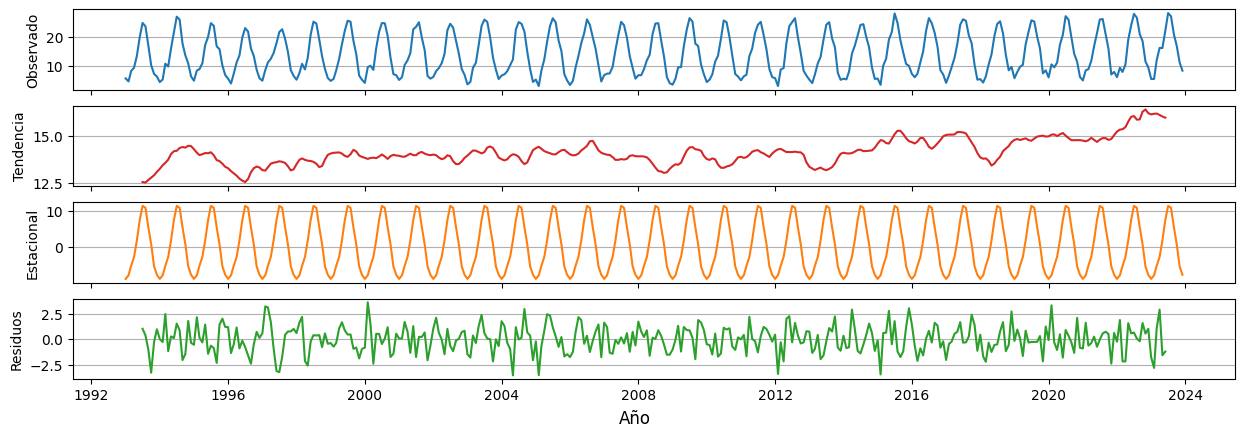

In [49]:
#Obtengo la gráfica con todos los datos que aporta el seasonal decompose de la temperatura

observado_T_30 = result_T_30.observed
tendencia_T_30 = result_T_30.trend
estacional_T_30 = result_T_30.seasonal
residuos_T_30 = result_T_30.resid

fig, ax = plt.subplots(4, sharex=True)

ax[0].plot(observado_T_30, color='tab:blue')
ax[0].set_ylabel('Observado')
#ax[0].xaxis.set_major_locator(ticker.MultipleLocator(960))
#ax[0].xaxis.set_minor_locator(ticker.MultipleLocator(192))
ax[0].grid(True, which='major', axis='y')

ax[1].plot(tendencia_T_30, color='tab:red')
ax[1].set_ylabel('Tendencia')
ax[1].grid(True, which='major', axis='y')

ax[2].plot(estacional_T_30, color='tab:orange')
ax[2].set_ylabel('Estacional')
ax[2].grid(True, which='major', axis='y')

ax[3].plot(residuos_T_30, color='tab:green')
ax[3].set_ylabel('Residuos')
ax[3].grid(True, which='major', axis='y')

fig.set_figwidth(15)
fig.supxlabel('Año')

'''plt.savefig('Seasonal decompose temperatura 30.pdf', format='pdf')
plt.savefig('Seasonal decompose temperatura 30.png', format='png')'''
plt.show()

Obtengo el test de Mann-Kendall tanto para los últimos 30 y 40 años

In [50]:
#Test de los últimos 40 años

test_TQV_40 = mk.original_test(anual_40['TQV'])
test_T_40 = mk.original_test(anual_40['T10M'])

In [51]:
#Test de los últimos 30 años

test_TQV_30 = mk.original_test(ultimos_30['TQV'])
test_T_30 = mk.original_test(ultimos_30['T10M'])

In [52]:
calculos_Test = [['Trend', test_TQV_40.trend, test_TQV_30.trend, test_T_40.trend, test_T_30.trend],
                ['h',test_TQV_40.h, test_TQV_30.h, test_T_40.h, test_T_30.h],
                ['p', test_TQV_40.p, test_TQV_30.p, test_T_40.p, test_T_30.p],
                ['z', test_TQV_40.z, test_TQV_30.z, test_T_40.z, test_T_30.z],
                ['Tau', test_TQV_40.Tau, test_TQV_30.Tau, test_T_40.Tau, test_T_30.Tau],
                ['s', test_TQV_40.s, test_TQV_30.s, test_T_40.s, test_T_30.s],
                ['var_s', test_TQV_40.var_s, test_TQV_30.var_s, test_T_40.var_s, test_T_30.var_s],
                ['Slope', test_TQV_40.slope, test_TQV_30.slope, test_T_40.slope, test_T_30.slope],
                ['Intercept', test_TQV_40.intercept, test_TQV_30.intercept, test_T_40.intercept, test_T_30.intercept]]

Test_Mann_Kendall = pd.DataFrame(calculos_Test, columns=['Prueba' ,'TQV 43 años', 'TQV 30 años', 'T 43 años', 'T 30 años'])

Test_Mann_Kendall

,Prueba,TQV 43 años,TQV 30 años,T 43 años,T 30 años
0,Trend,increasing,increasing,increasing,increasing
1,h,True,True,True,True
2,p,0.000876,0.000185,0.000007,0.00008
3,z,3.327592,3.739212,4.500847,3.943169
4,Tau,0.348837,0.475269,0.471459,0.501075
5,s,330.0,221.0,446.0,233.0
6,var_s,9775.333333,3461.666667,9775.333333,3461.666667
7,Slope,0.02503,0.05266,0.035804,0.051583
8,Intercept,11.985572,11.9276,13.187538,13.335333


Obtengo la evolución de temperatura y vapor de agua con ajuste

In [53]:
#Usando numpy

ajuste_T_IWV_np = np.polyfit(df['T10M'], df['TQV'], deg=1)

m_T_IWV, y_0_T_IWV = ajuste_T_IWV_np

#m_SR_GNSS = 0.98938113
#y_0_SR_GNSS = 0.1740024

print(ajuste_T_IWV_np)

[0.42082028 6.68178384]


In [54]:
#Usando sklearn

#Õbtengo el ajuste
ajuste_T_IWV_sk = linear_model.LinearRegression()
ajuste_T_IWV_sk.fit(X = pd.DataFrame(df['T10M']),
                       y = df['TQV'])

#Obtengo la pendiente
#y_0_SP = ajuste_SP_MERRA_sk.intercept_

#Obtengo el R^2
R_2_T_IWV = ajuste_T_IWV_sk.score(X = pd.DataFrame(df['T10M']),
                       y = df['TQV'])

#Obtengo cuanto difieren los datos obrenidos con el ajuste y los reales
prediccion_T_IWV = ajuste_T_IWV_sk.predict(X = pd.DataFrame(df['T10M']))

#residuos_SP = union_SP_MERRA['SP'] - prediccion_SP

#Obtengo el RMSE
def rmse(predicted, target):
    return(np.sqrt(np.mean((target-predicted)**2)))

#RMSE_SP = rmse(prediccion_SP, union_SP_MERRA['SP'])
RMSE_T_IWV = mean_squared_error(prediccion_T_IWV, df['TQV'])**0.5


print('Pendiente: ', m_T_IWV , '\n', 'R^2: ', R_2_T_IWV, '\n', 'rmse: ', RMSE_T_IWV)

Pendiente:  0.42082027893307994 
 R^2:  0.7318460743517 
 rmse:  1.8352899218346885


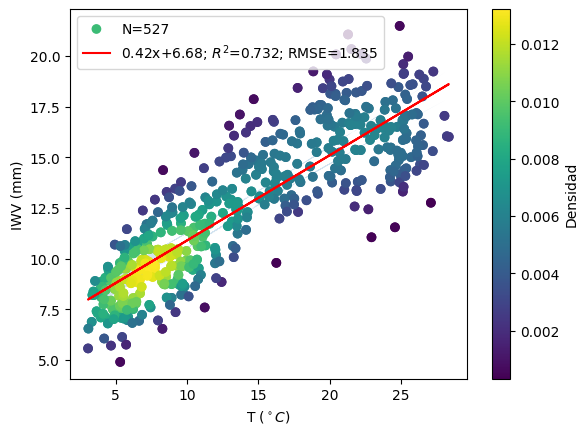

In [55]:
#Obtengo la densidad de puntos
xy = np.vstack([df['T10M'],df['TQV']])
z = gaussian_kde(xy)(xy)

#obtengo los errores del ajuste
y_est = m_T_IWV*df['T10M'] + y_0_T_IWV
y_err = df['T10M'].std()*np.sqrt(1/len(df['T10M']) + 
                                                   (df['T10M']-df['T10M'].mean())**2 / 
                                                    np.sum((df['T10M']-df['T10M'].mean())**2))

fig, ax=plt.subplots()

#Muestro los puntos
ax.scatter(x = df['T10M'], y= df['TQV'], c=z, label='N=527')
ax.set_xlabel(r'T ($^\circ C$)')
ax.set_ylabel('IWV (mm)')

#Muestro la línea de ajuste
ax.plot(df['T10M'], y_est, color='r', label=r'0.42x+6.68; $R^2$=0.732; RMSE=1.835')
ax.fill_between(df['T10M'], y_est - y_err, y_est + y_err, alpha=0.2)

#Muestro la línea teórica 1:1
#x1 = [0, 40]
#ax.plot(x1, x1, color='black', label='1:1')

#Obtengo la leyenda de la densidad de puntos
sc = ax.scatter(x=df['T10M'], y=df['TQV'], c=z)
cbar = fig.colorbar(sc)
cbar.set_label('Densidad')

plt.legend(loc='upper left')
'''plt.savefig('Ajuste temperatura y vapor de agua.pdf', format='pdf')
plt.savefig('Ajuste temperatura y vapor de agua.png', format='png')'''
plt.show()

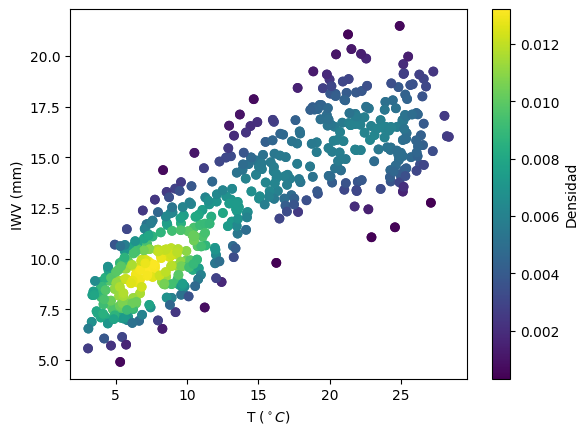

In [56]:
#Obtengo la densidad de puntos
xy = np.vstack([df['T10M'],df['TQV']])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()

ax.scatter(df.T10M, df.TQV, c=z)

ax.set_xlabel(r'T ($^\circ C$)')
ax.set_ylabel('IWV (mm)')

#Obtengo la leyenda de la densidad de puntos
sc = ax.scatter(x=df['T10M'], y=df['TQV'], c=z)
cbar = fig.colorbar(sc)
cbar.set_label('Densidad')

'''plt.savefig('Temperatura frente a vapor de agua.pdf', format='pdf')
plt.savefig('Temperatura frente a vapor de agua.png', format='png')'''
plt.show()

In [57]:
#Usando numpy

ajuste_T_IWV_np = np.polyfit(df['TQV'], df['T10M'], deg=1)

m_T_IWV, y_0_T_IWV = ajuste_T_IWV_np

#m_SR_GNSS = 0.98938113
#y_0_SR_GNSS = 0.1740024

print(ajuste_T_IWV_np)

[ 1.73909412 -7.87161302]


In [58]:
#Usando sklearn

#Õbtengo el ajuste
ajuste_T_IWV_sk = linear_model.LinearRegression()
ajuste_T_IWV_sk.fit(X = pd.DataFrame(df['TQV']),
                       y = df['T10M'])

#Obtengo la pendiente
#y_0_SP = ajuste_SP_MERRA_sk.intercept_

#Obtengo el R^2
R_2_T_IWV = ajuste_T_IWV_sk.score(X = pd.DataFrame(df['TQV']),
                       y = df['T10M'])

#Obtengo cuanto difieren los datos obrenidos con el ajuste y los reales
prediccion_T_IWV = ajuste_T_IWV_sk.predict(X = pd.DataFrame(df['TQV']))

#residuos_SP = union_SP_MERRA['SP'] - prediccion_SP

#Obtengo el RMSE
def rmse(predicted, target):
    return(np.sqrt(np.mean((target-predicted)**2)))

#RMSE_SP = rmse(prediccion_SP, union_SP_MERRA['SP'])
RMSE_T_IWV = mean_squared_error(prediccion_T_IWV, df['T10M'])**0.5


print('Pendiente: ', m_T_IWV , '\n', 'R^2: ', R_2_T_IWV, '\n', 'rmse: ', RMSE_T_IWV)

Pendiente:  1.739094123997955 
 R^2:  0.7318460743516999 
 rmse:  3.730936810976118


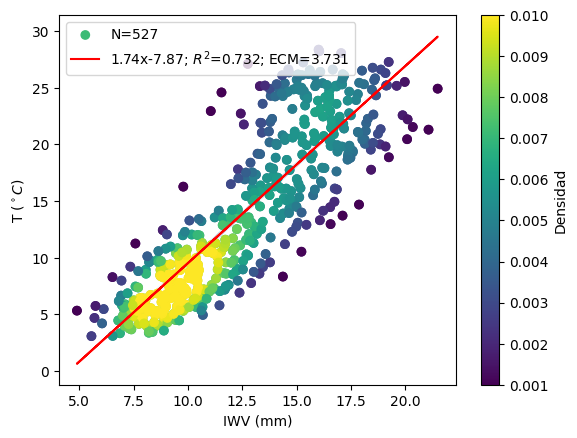

In [59]:
#Obtengo la densidad de puntos
xy = np.vstack([df['T10M'],df['TQV']])
z = gaussian_kde(xy)(xy)

#obtengo los errores del ajuste
y_est = m_T_IWV*df['TQV'] + y_0_T_IWV
y_err = df['TQV'].std()*np.sqrt(1/len(df['TQV']) + 
                                                   (df['TQV']-df['TQV'].mean())**2 / 
                                                    np.sum((df['TQV']-df['TQV'].mean())**2))

fig, ax=plt.subplots()

#Muestro los puntos
ax.scatter(x = df['TQV'], y= df['T10M'], c=z, label='N=527')
ax.set_xlabel('IWV (mm)')
ax.set_ylabel(r'T ($^\circ C$)')

#Muestro la línea de ajuste
ax.plot(df['TQV'], y_est, color='r', label=r'1.74x-7.87; $R^2$=0.732; ECM=3.731')
ax.fill_between(df['TQV'], y_est - y_err, y_est + y_err, alpha=0.2)

#Muestro la línea teórica 1:1
#x1 = [0, 40]
#ax.plot(x1, x1, color='black', label='1:1')

#Obtengo la leyenda de la densidad de puntos
sc = ax.scatter(x=df['TQV'], y=df['T10M'], c=z, vmin=0.001, vmax=0.01)
cbar = fig.colorbar(sc)
cbar.set_label('Densidad')

plt.legend(loc='upper left')
plt.savefig('Ajuste temperatura y vapor de agua T en y.pdf', format='pdf')
plt.savefig('Ajuste temperatura y vapor de agua T en y.png', format='png')
plt.show()

Creo la línea de tendencia para la evolución anual de la temperatura y vapor de agua de los últimos 30 y 40 años

In [60]:
#Realizo un ajuste lineal para obtener la pendiente y demás datos estadísticos
ajuste_40 = anual_40

y=np.array(ajuste_40['TQV'].dropna().values, dtype=float)
x=np.array(pd.to_datetime(ajuste_40['Combined'].dropna()).index.values, dtype=float, copy=False)

slope_TQV_40, intercept_TQV_40, r_value_TQV_40, p_value_TQV_40, std_err_TQV_40 = stats.linregress(x,y)

#Necesito crear valores en x para poder plotear la recta
xf = np.linspace(min(x),max(x),44)
xf1 = xf.copy()

#Devuelvo los valores de x a formato fecha, no se hacerlo así que no lo usaré
xf1 = pd.to_datetime(xf1, unit='D',
               origin=pd.Timestamp('1980-01-01'))

#Obtengo los valores de y estimados con la pendiente obtenida anteriormente
yf_TQV_40 = (slope_TQV_40*xf) + intercept_TQV_40
print('r = ', r_value_TQV_40, '\n', 'p = ', p_value_TQV_40, '\n', 's = ', std_err_TQV_40, '\n','slope=', slope_TQV_40, '\n', 'Intercept', intercept_TQV_40)

r =  0.47960603335593505 
 p =  0.00098718362516153 
 s =  0.00676098971357644 
 slope= 0.023948614047451265 
 Intercept 12.049714646464647


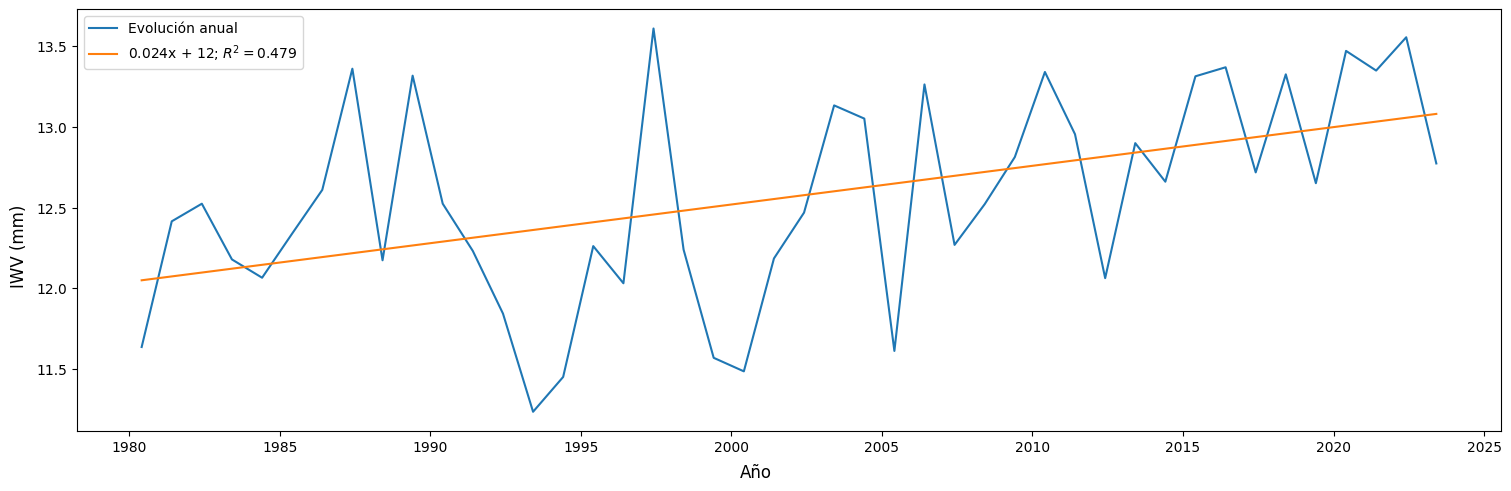

In [61]:
#Creo la gráfica de la evolución anual del vapor de agua en los útimos 40 años
fig, ax = plt.subplots(constrained_layout=True)

#Ploteo los datos que tengo
ax.plot(anual_40.Combined, anual_40.TQV, label='Evolución anual')

#Ploteo la recta de ajuste
ax.plot(ajuste_40['Combined'], yf_TQV_40,label=r'0.024x + 12; $R^2=0.479$')

ax.legend(loc='upper left')

fig.set_figwidth(15)
fig.supxlabel('Año')
fig.supylabel('IWV (mm)')
plt.show()

Ahora con la temperatura

In [62]:
#Realizo un ajuste lineal para obtener la pendiente y demás datos estadísticos

y=np.array(ajuste_40['T10M'].dropna().values, dtype=float)
x=np.array(pd.to_datetime(ajuste_40['Combined'].dropna()).index.values, dtype=float, copy=False)

slope_T_40, intercept_T_40, r_value_T_40, p_value_T_40, std_err_T_40 = stats.linregress(x,y)

#Necesito crear valores en x para poder plotear la recta
xf = np.linspace(min(x),max(x),44)
xf1 = xf.copy()

#Devuelvo los valores de x a formato fecha, no se hacerlo así que no lo usaré
xf1 = pd.to_datetime(xf1, unit='D',
               origin=pd.Timestamp('1980-01-01'))

#Obtengo los valores de y estimados con la pendiente obtenida anteriormente
yf_T_40 = (slope_T_40*xf) + intercept_T_40
print('r = ', r_value_T_40, '\n', 'p = ', p_value_T_40, '\n', 's = ', std_err_T_40, '\n','slope=', slope_T_40, '\n', 'Intercept', intercept_T_40)

r =  0.6478163181057712 
 p =  1.9987764653492307e-06 
 s =  0.006880555621784927 
 slope= 0.03791936222692036 
 Intercept 13.164159848484871


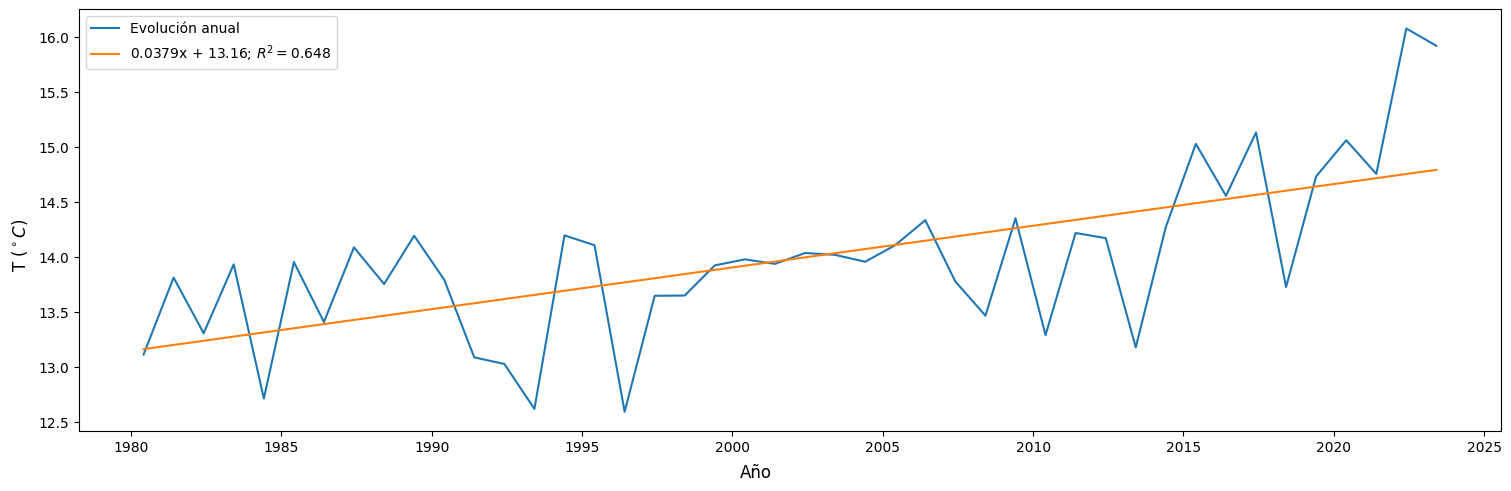

In [63]:
#Creo la gráfica de la evolución anual del vapor de agua en los útimos 40 años
fig, ax = plt.subplots(constrained_layout=True)

#Ploteo los datos que tengo
ax.plot(anual_40.Combined, anual_40.T10M, label='Evolución anual')

#Ploteo la recta de ajuste
ax.plot(ajuste_40['Combined'], yf_T_40,label=r'0.0379x + 13.16; $R^2=0.648$')

ax.legend(loc='upper left')

fig.set_figwidth(15)
fig.supxlabel('Año')
fig.supylabel(r'T ($^\circ C$)')
plt.show()

Ahora con los últimos 30 años

In [64]:
#Realizo un ajuste lineal para obtener la pendiente y demás datos estadísticos
ajuste_30 = ultimos_30

y=np.array(ajuste_30['TQV'].dropna().values, dtype=float)
x=np.array(pd.to_datetime(ajuste_30['Combined'].dropna()).index.values, dtype=float, copy=False)

slope_TQV_30, intercept_TQV_30, r_value_TQV_30, p_value_TQV_30, std_err_TQV_30 = stats.linregress(x,y)

#Necesito crear valores en x para poder plotear la recta
xf = np.linspace(min(x),max(x),31)
xf1 = xf.copy()

#Devuelvo los valores de x a formato fecha, no se hacerlo así que no lo usaré
xf1 = pd.to_datetime(xf1, unit='D',
               origin=pd.Timestamp('1980-01-01'))

#Obtengo los valores de y estimados con la pendiente obtenida anteriormente
yf_TQV_30 = (slope_TQV_30*xf) + intercept_TQV_30
print('r = ', r_value_TQV_30, '\n', 'p = ', p_value_TQV_30, '\n', 's = ', std_err_TQV_30, '\n','slope=', slope_TQV_30, '\n', 'Intercept', intercept_TQV_30)

r =  0.6293320606739664 
 p =  0.0001490077567183051 
 s =  0.010930359971229152 
 slope= 0.047666801075268814 
 Intercept 11.298455913978493


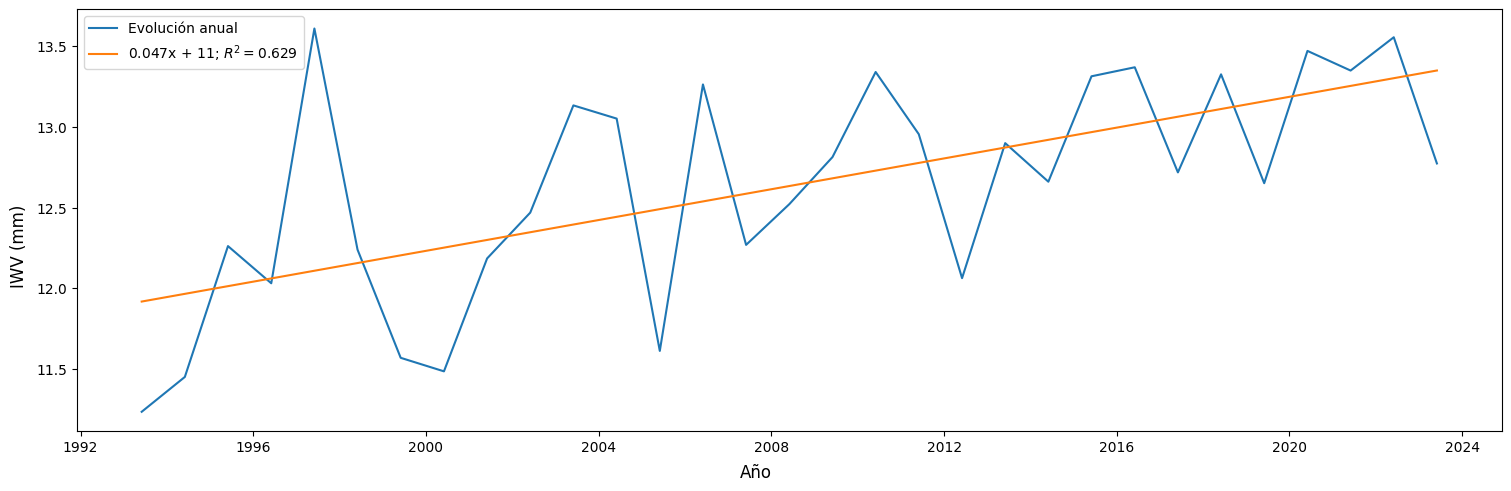

In [65]:
#Creo la gráfica de la evolución anual del vapor de agua en los útimos 40 años
fig, ax = plt.subplots(constrained_layout=True)

#Ploteo los datos que tengo
ax.plot(ultimos_30.Combined, ultimos_30.TQV, label='Evolución anual')

#Ploteo la recta de ajuste
ax.plot(ajuste_30['Combined'], yf_TQV_30,label=r'0.047x + 11; $R^2=0.629$')

ax.legend(loc='upper left')

fig.set_figwidth(15)
fig.supxlabel('Año')
fig.supylabel('IWV (mm)')
plt.show()

In [66]:
#Realizo un ajuste lineal para obtener la pendiente y demás datos estadísticos
ajuste_30 = ultimos_30

y=np.array(ajuste_30['T10M'].dropna().values, dtype=float)
x=np.array(pd.to_datetime(ajuste_30['Combined'].dropna()).index.values, dtype=float, copy=False)

slope_T_30, intercept_T_30, r_value_T_30, p_value_T_30, std_err_T_30 = stats.linregress(x,y)

#Necesito crear valores en x para poder plotear la recta
xf = np.linspace(min(x),max(x),31)
xf1 = xf.copy()

#Devuelvo los valores de x a formato fecha, no se hacerlo así que no lo usaré
xf1 = pd.to_datetime(xf1, unit='D',
               origin=pd.Timestamp('1980-01-01'))

#Obtengo los valores de y estimados con la pendiente obtenida anteriormente
yf_T_30 = (slope_T_30*xf) + intercept_T_30
print('r = ', r_value_T_30, '\n', 'p = ', p_value_T_30, '\n', 's = ', std_err_T_30, '\n','slope=', slope_T_30, '\n', 'Intercept', intercept_T_30)

r =  0.6879683444786033 
 p =  1.895103053416256e-05 
 s =  0.011587519593324989 
 slope= 0.059152956989247205 
 Intercept 12.501348924731213


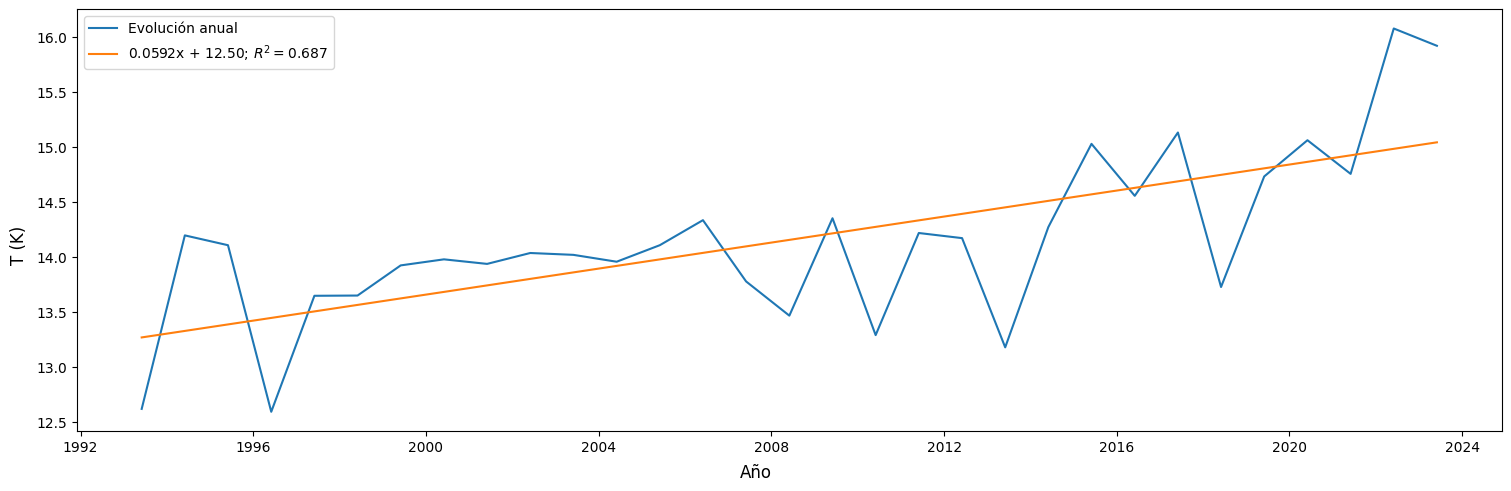

In [67]:
#Creo la gráfica de la evolución anual del vapor de agua en los útimos 40 años
fig, ax = plt.subplots(constrained_layout=True)

#Ploteo los datos que tengo
ax.plot(ultimos_30.Combined, ultimos_30.T10M, label='Evolución anual')

#Ploteo la recta de ajuste
ax.plot(ajuste_30['Combined'], yf_T_30,label=r'0.0592x + 12.50; $R^2=0.687$')

ax.legend(loc='upper left')

fig.set_figwidth(15)
fig.supxlabel('Año')
fig.supylabel('T (K)')
plt.show()

Ahora obtenemos éstas gráficas conjuntas

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\3457217249.py:41: UserWarning: The figure layout has changed to tight
  fig.tight_layout()  # otherwise the right y-label is slightly clipped


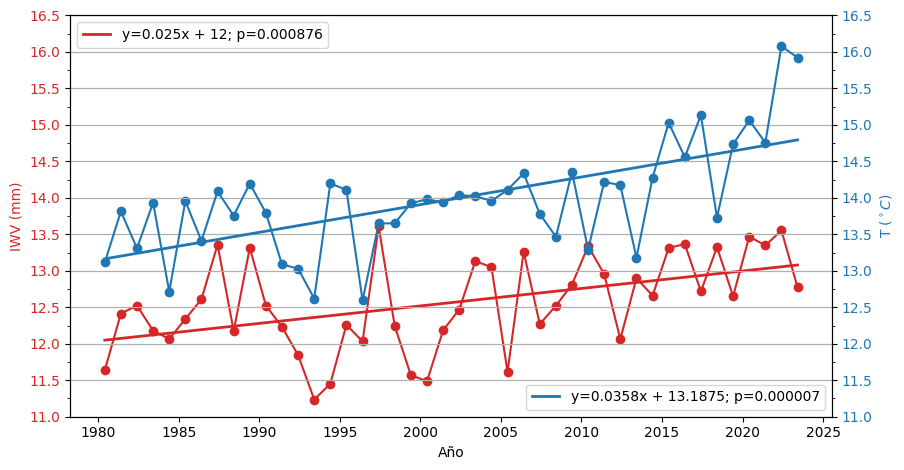

In [68]:
fig, ax1 = plt.subplots(constrained_layout=True)

#Pongo los ejes y ploteo los datos
color1 = 'tab:red'
ax1.set_xlabel('Año')
ax1.set_ylabel('IWV (mm)', color=color1)
ax1.plot(anual_40.Combined, anual_40.TQV, color=color1)
ax1.scatter(anual_40.Combined, anual_40.TQV, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, which='major', axis='y')

#Ploteo la línea de ajuste
ax1.plot(ajuste_40['Combined'], yf_TQV_40, color=color1, lw=2, label='y=0.025x + 12; p=0.000876')

ax1.legend(loc='upper left')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax1.set_ylim(11, 16.5)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#Coloco los ejes y ploteo los datos
color2 = 'tab:blue'
ax2.set_ylabel(r'T ($^\circ C$)', color=color2)  # we already handled the x-label with ax1
ax2.plot(anual_40.Combined, anual_40.T10M, color=color2)
ax2.scatter(anual_40.Combined, anual_40.T10M, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(True, which='major', axis='y')

#Ploteo la línea de ajuste
ax2.plot(ajuste_40['Combined'], yf_T_40, color=color2, lw=2, label='y=0.0358x + 13.1875; p=0.000007')

ax2.legend(loc='lower right')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax2.set_ylim(11, 16.5)

'''ax1_yticks = ax1.get_yticks()
ax2.set_yticks(ax1_yticks)'''

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_figwidth(10)
#fig.legend(loc='upper left')

plt.savefig('Evolucion vapor de agua y temperatura con ajuste 40.pdf', format='pdf')
plt.savefig('Evolucion vapor de agua y temperatura con ajuste 40.png', format='png')
plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\2335621496.py:38: UserWarning: The figure layout has changed to tight
  fig.tight_layout()  # otherwise the right y-label is slightly clipped


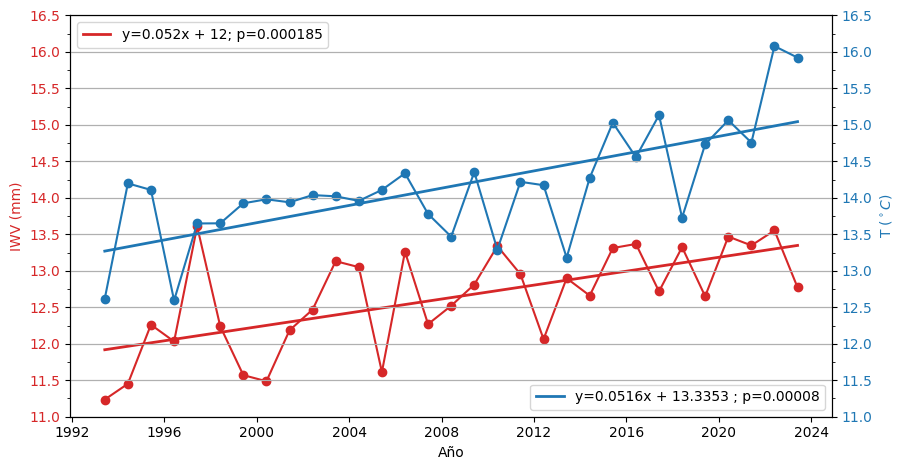

In [69]:
fig, ax1 = plt.subplots(constrained_layout=True)

#Pongo los ejes y ploteo los datos
color1 = 'tab:red'
ax1.set_xlabel('Año')
ax1.set_ylabel('IWV (mm)', color=color1)
ax1.plot(ultimos_30.Combined, ultimos_30.TQV, color=color1)
ax1.scatter(ultimos_30.Combined, ultimos_30.TQV, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, which='major', axis='y')

#Ploteo la línea de ajuste
ax1.plot(ajuste_30['Combined'], yf_TQV_30, color=color1, lw=2, label='y=0.052x + 12; p=0.000185')

ax1.legend(loc='upper left')
ax1.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax1.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax1.set_ylim(11, 16.5)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#Coloco los ejes y ploteo los datos
color2 = 'tab:blue'
ax2.set_ylabel(r'T ($^\circ C$)', color=color2)  # we already handled the x-label with ax1
ax2.plot(ultimos_30.Combined, ultimos_30.T10M, color=color2)
ax2.scatter(ultimos_30.Combined, ultimos_30.T10M, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
ax2.grid(True, which='major', axis='y')

#Ploteo la línea de ajuste
ax2.plot(ajuste_30['Combined'], yf_T_30, color=color2, lw=2, label='y=0.0516x + 13.3353 ; p=0.00008')

ax2.legend(loc='lower right')
ax2.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
ax2.yaxis.set_minor_locator(ticker.MultipleLocator(0.25))
ax2.set_ylim(11, 16.5)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
fig.set_figwidth(10)
#fig.legend(loc='upper left')

#ax2.set_yticks(np.linspace(ax2.get_yticks()[0], ax2.get_yticks()[-1], len(ax1.get_yticks())))

plt.savefig('Evolucion vapor de agua y temperatura con ajuste 30.pdf', format='pdf')
plt.savefig('Evolucion vapor de agua y temperatura con ajuste 30.png', format='png')
plt.show()

Realizamos ahora el analisis estacional de los datos

Primero hago un boxplot con los datos de cada mes

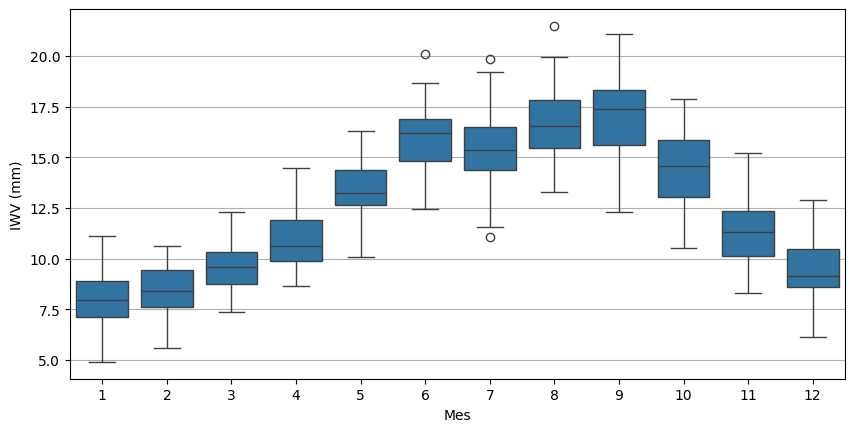

In [70]:
fig, ax = plt.subplots()

sbs.boxplot(data=f_40, x = 'Mes', y = 'TQV')

ax.grid(True, which='major', axis='y')

ax.set(ylabel='IWV (mm)')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(10)

plt.savefig('Boxplot mensual vapor de agua 40.pdf', format='pdf')
plt.savefig('Boxplot mensual vapor de agua 40.png', format='png')
plt.show()

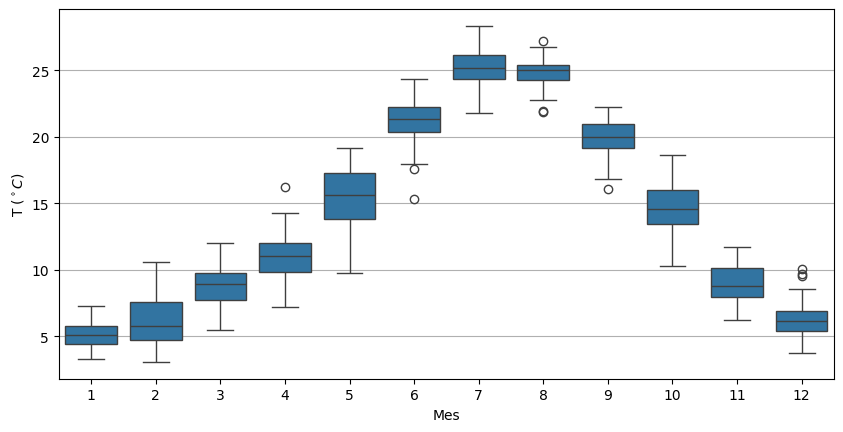

In [71]:
fig, ax = plt.subplots()

sbs.boxplot(data=f_40, x = 'Mes', y = 'T10M')

ax.grid(True, which='major', axis='y')

ax.set(ylabel=r'T ($^\circ C$)')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(10)

'''plt.savefig('Boxplot mensual temperatura 40.pdf', format='pdf')
plt.savefig('Boxplot mensual temperatura 40.png', format='png')'''
plt.show()

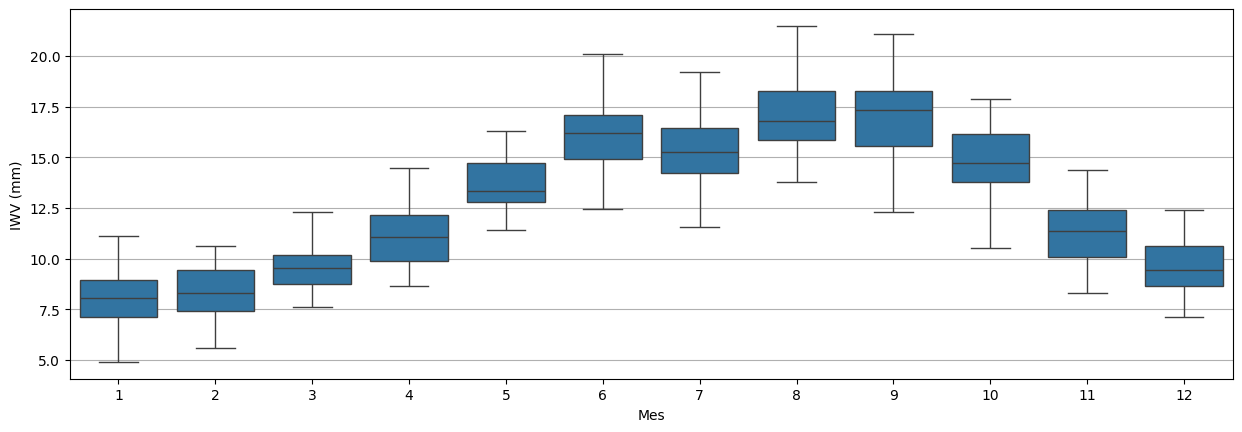

In [72]:
fig, ax = plt.subplots()

sbs.boxplot(data=f_30, x = 'Mes', y = 'TQV')

ax.grid(True, which='major', axis='y')

ax.set(ylabel='IWV (mm)')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(15)

'''plt.savefig('Boxplot mensual vapor de agua 30.pdf', format='pdf')
plt.savefig('Boxplot mensual vapor de agua 30.png', format='png')'''
plt.show()

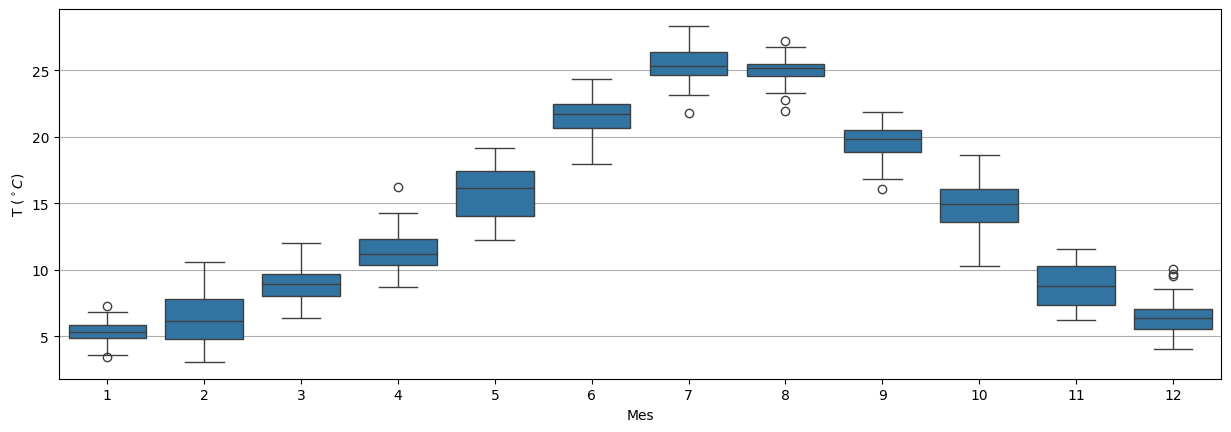

In [73]:
fig, ax = plt.subplots()

sbs.boxplot(data=f_30, x = 'Mes', y = 'T10M')

ax.grid(True, which='major', axis='y')

ax.set(ylabel=r'T ($^\circ C$)')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(15)

'''plt.savefig('Boxplot mensual temperatura 30.pdf', format='pdf')
plt.savefig('Boxplot mensual temperatura 30.png', format='png')'''
plt.show()

Ahora por estaciones

In [74]:
primavera_40 = f_40.loc[(f_40.Mes >= 3.0) & (f_40.Mes <= 5.0)]
primavera_30 = f_30.loc[(f_30.Mes >= 3.0) & (f_30.Mes <= 5.0)]

verano_40 = f_40.loc[(f_40.Mes >= 6.0) & (f_40.Mes <= 8.0)]
verano_30 = f_30.loc[(f_30.Mes >= 6.0) & (f_30.Mes <= 8.0)]

otono_40 = f_40.loc[(f_40.Mes >= 9.0) & (f_40.Mes <= 11.0)]
otono_30 = f_30.loc[(f_30.Mes >= 9.0) & (f_30.Mes <= 11.0)]

invierno_40 = f_40.loc[(f_40.Mes >= 1.0) & (f_40.Mes <= 2.0) | (f_40.Mes == 12.0)]
invierno_30 = f_30.loc[(f_30.Mes >= 1.0) & (f_30.Mes <= 2.0) | (f_30.Mes == 12.0)]

Primero 40 años, en orden Primavera, verano, otoño e invierno

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\3531635972.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


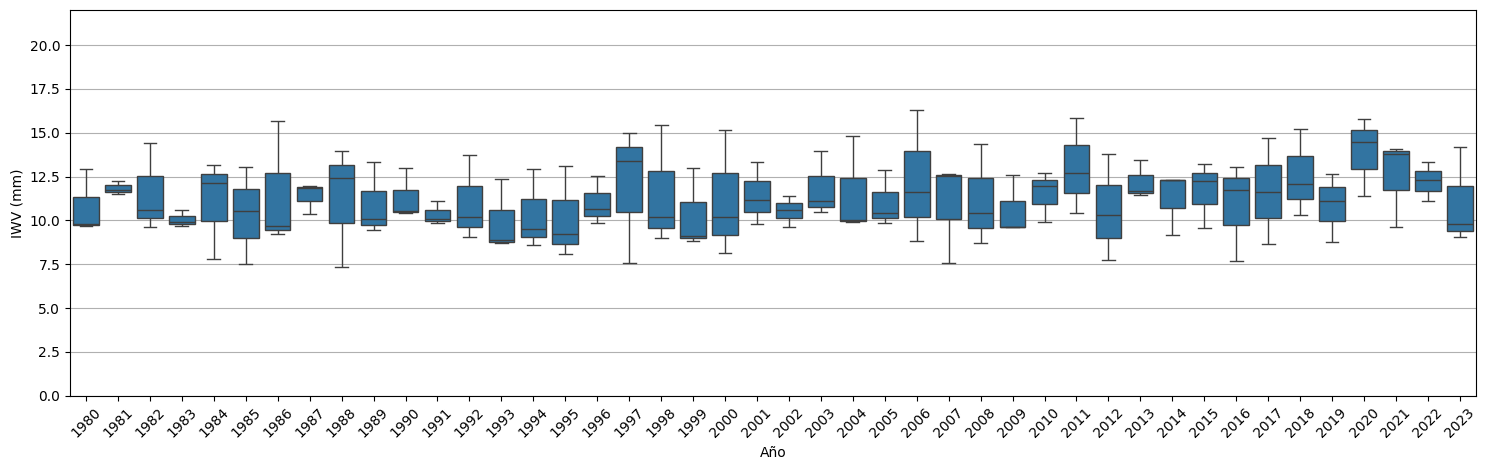

In [75]:
fig, ax = plt.subplots()

sbs.boxplot(data=primavera_40, x = 'Año', y = 'TQV')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 22)

ax.set(ylabel='IWV (mm)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

plt.tight_layout()
plt.savefig('Boxplot primavera vapor de agua 40.pdf', format='pdf')
plt.savefig('Boxplot primavera vapor de agua 40.png', format='png')
plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\1382861723.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


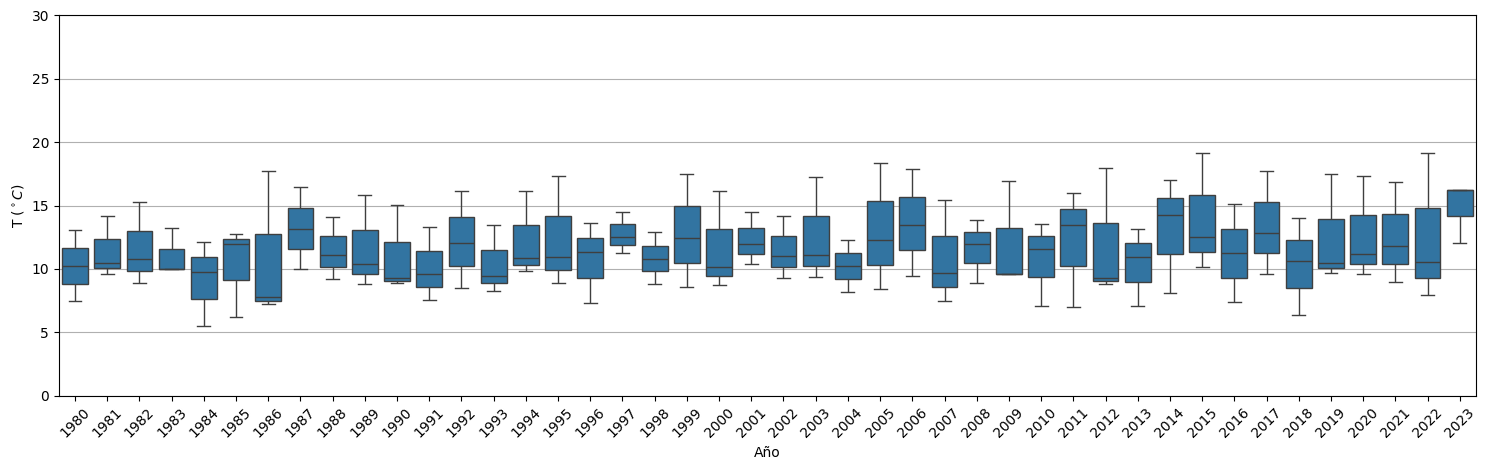

In [76]:
fig, ax = plt.subplots()

sbs.boxplot(data=primavera_40, x = 'Año', y = 'T10M')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 30)

ax.set(ylabel=r'T ($^\circ C$)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

plt.tight_layout()
'''plt.savefig('Boxplot primavera temperatura 40.pdf', format='pdf')
plt.savefig('Boxplot primavera temperatura 40.png', format='png')'''
plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\2529197900.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


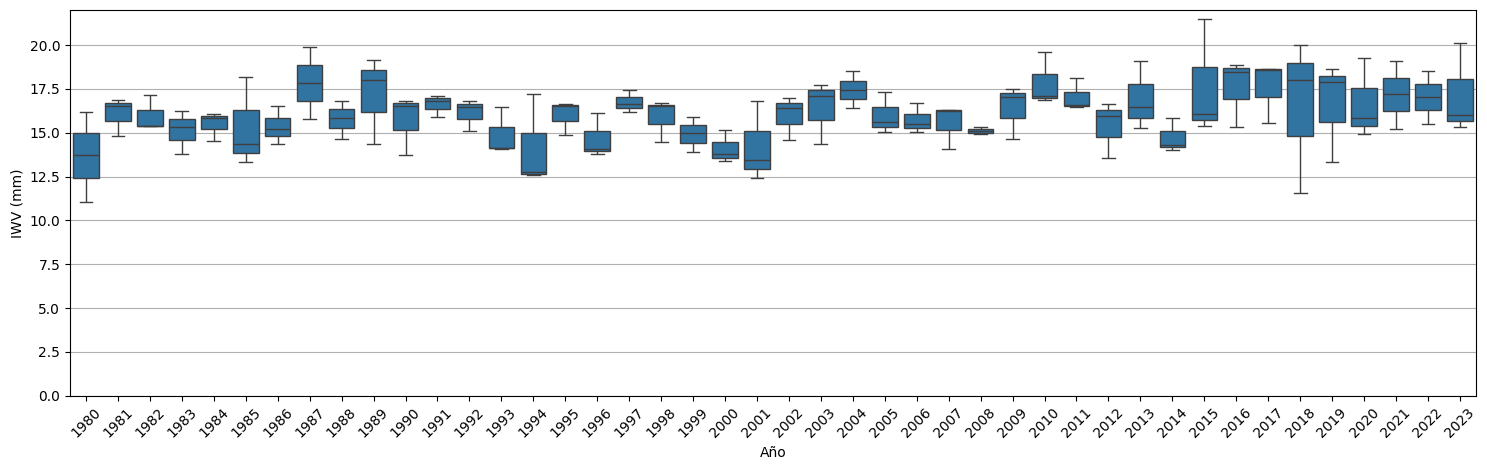

In [77]:
fig, ax = plt.subplots()

sbs.boxplot(data=verano_40, x = 'Año', y = 'TQV')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 22)

ax.set(ylabel='IWV (mm)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

plt.tight_layout()
plt.savefig('Boxplot verano vapor de agua 40.pdf', format='pdf')
plt.savefig('Boxplot verano vapor de agua 40.png', format='png')
plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\4077385238.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


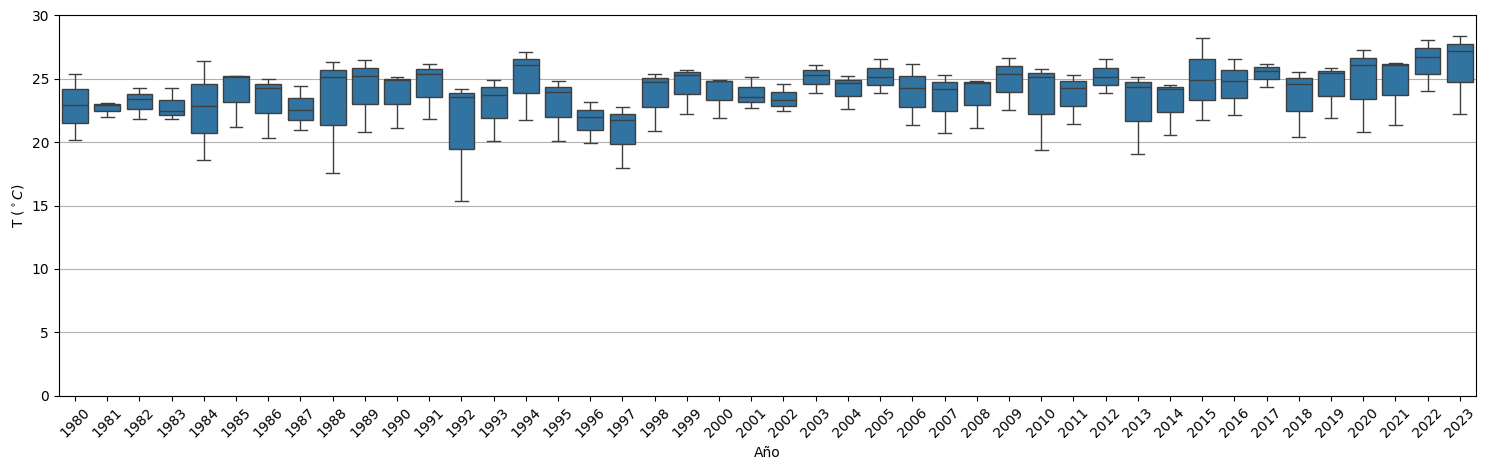

In [78]:
fig, ax = plt.subplots()

sbs.boxplot(data=verano_40, x = 'Año', y = 'T10M')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 30)

ax.set(ylabel=r'T ($^\circ C$)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

plt.tight_layout()
'''plt.savefig('Boxplot verano temperatura 40.pdf', format='pdf')
plt.savefig('Boxplot verano temperatura 40.png', format='png')'''
plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\1894106039.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


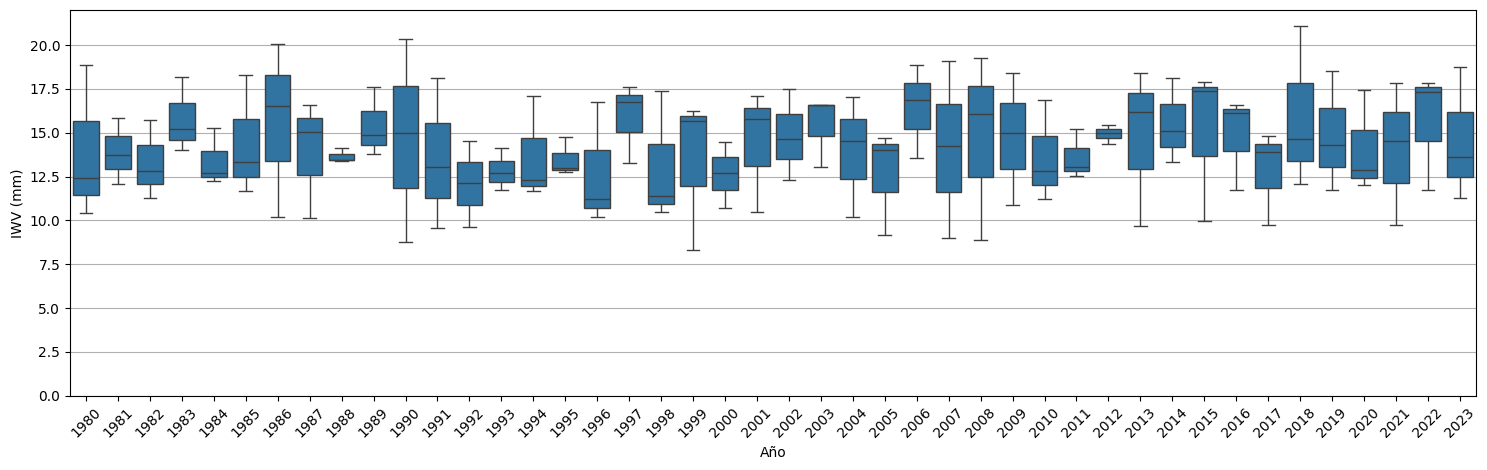

In [79]:
fig, ax = plt.subplots()

sbs.boxplot(data=otono_40, x = 'Año', y = 'TQV')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 22)

ax.set(ylabel='IWV (mm)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

plt.tight_layout()
plt.savefig('Boxplot otono vapor dea agua 40.pdf', format='pdf')
plt.savefig('Boxplot otono vapor dea agua 40.png', format='png')
plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\2531267958.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


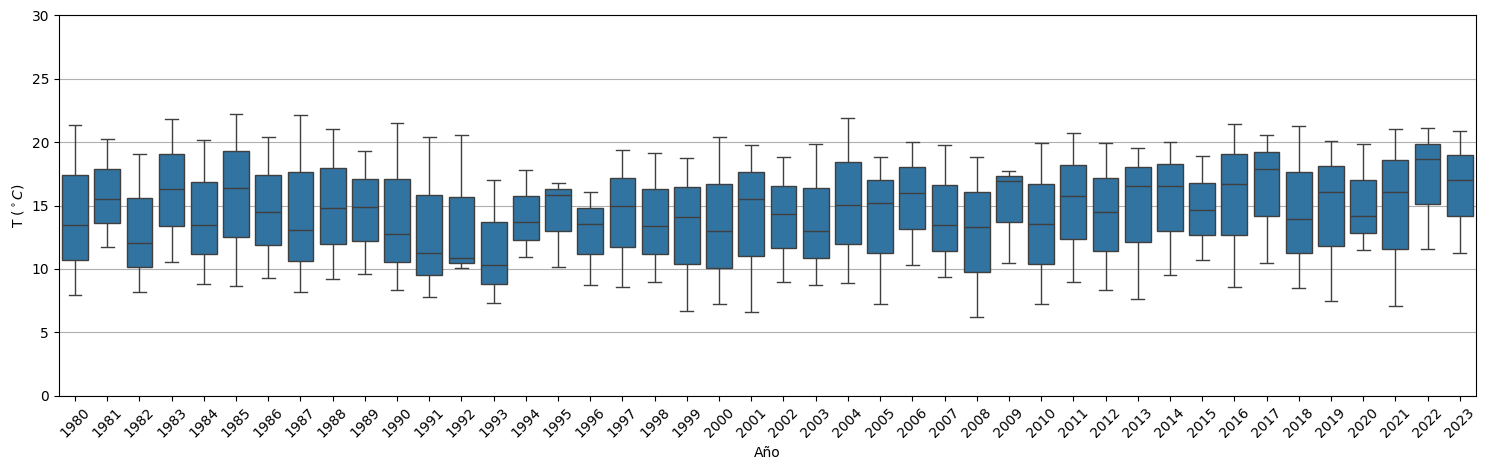

In [80]:
fig, ax = plt.subplots()

sbs.boxplot(data=otono_40, x = 'Año', y = 'T10M')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 30)

ax.set(ylabel=r'T ($^\circ C$)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

plt.tight_layout()
'''plt.savefig('Boxplot otono temperatura 40.pdf', format='pdf')
plt.savefig('Boxplot otono temperatura 40.png', format='png')'''
plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\3721117892.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


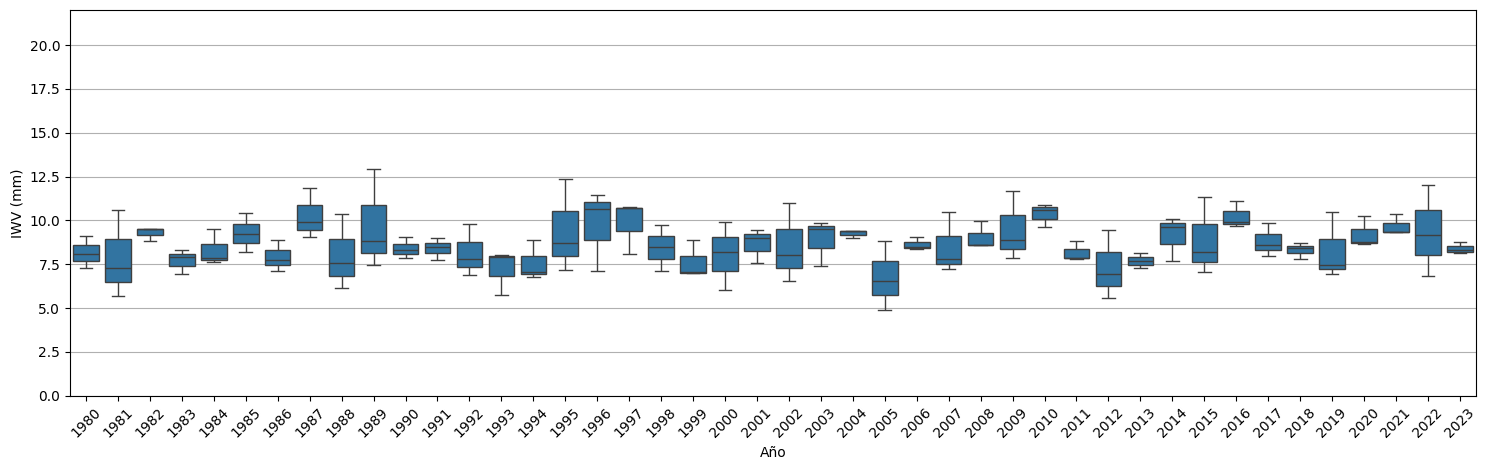

In [81]:
fig, ax = plt.subplots()

sbs.boxplot(data=invierno_40, x = 'Año', y = 'TQV')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 22)

ax.set(ylabel='IWV (mm)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

plt.tight_layout()
plt.savefig('Boxplot invierno vapor de agua 40.pdf', format='pdf')
plt.savefig('Boxplot invierno vapor de agua 40.png', format='png')
plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\2979176116.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


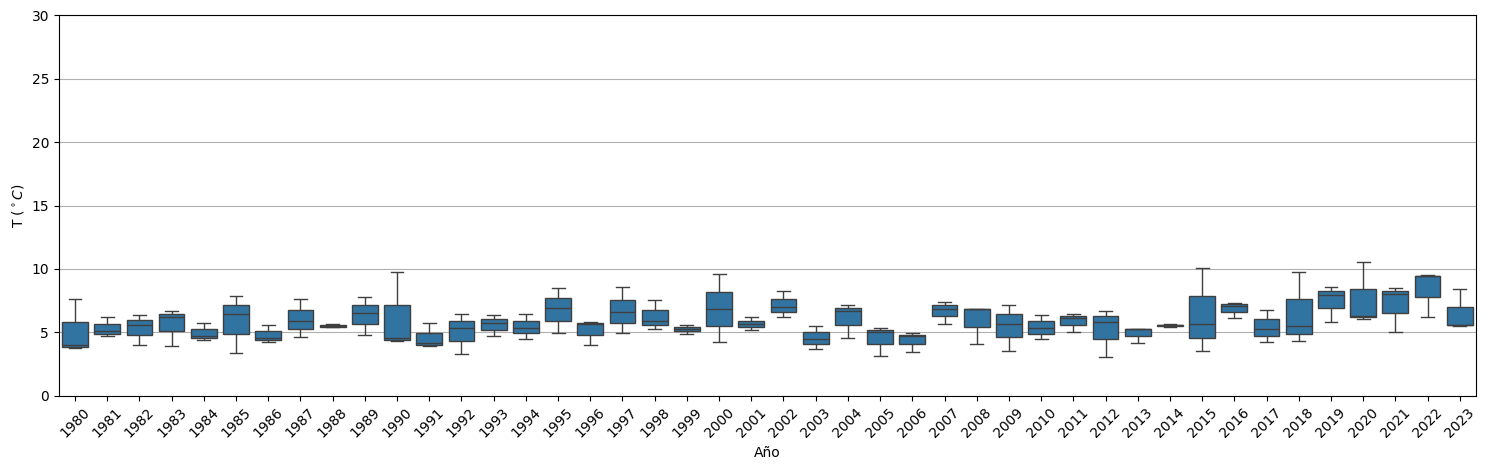

In [82]:
fig, ax = plt.subplots()

sbs.boxplot(data=invierno_40, x = 'Año', y = 'T10M')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 30)

ax.set(ylabel=r'T ($^\circ C$)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

plt.tight_layout()
'''plt.savefig('Boxplot invierno temperatura 40.pdf', format='pdf')
plt.savefig('Boxplot invierno temperatura 40.png', format='png')'''
plt.show()

Ahora con los últimos 30 años, mismo orden

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\4121376194.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


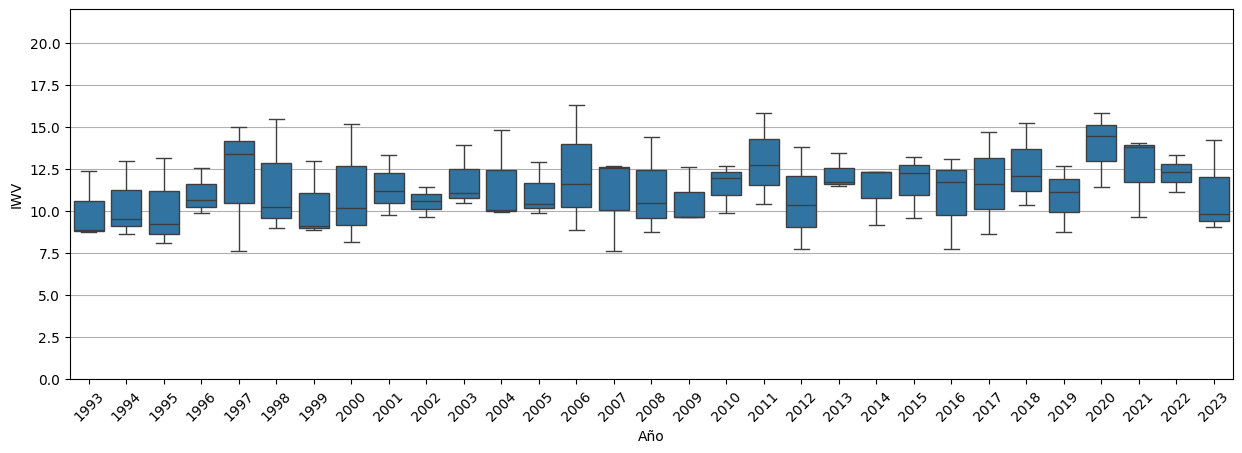

In [83]:
fig, ax = plt.subplots()

sbs.boxplot(data=primavera_30, x = 'Año', y = 'TQV')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 22)

ax.set(ylabel='IWV')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

'''plt.savefig('Boxplot primavera vapor de agua 30.pdf', format='pdf')
plt.savefig('Boxplot primavera vapor de agua 30.png', format='png')'''
plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\2987083044.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


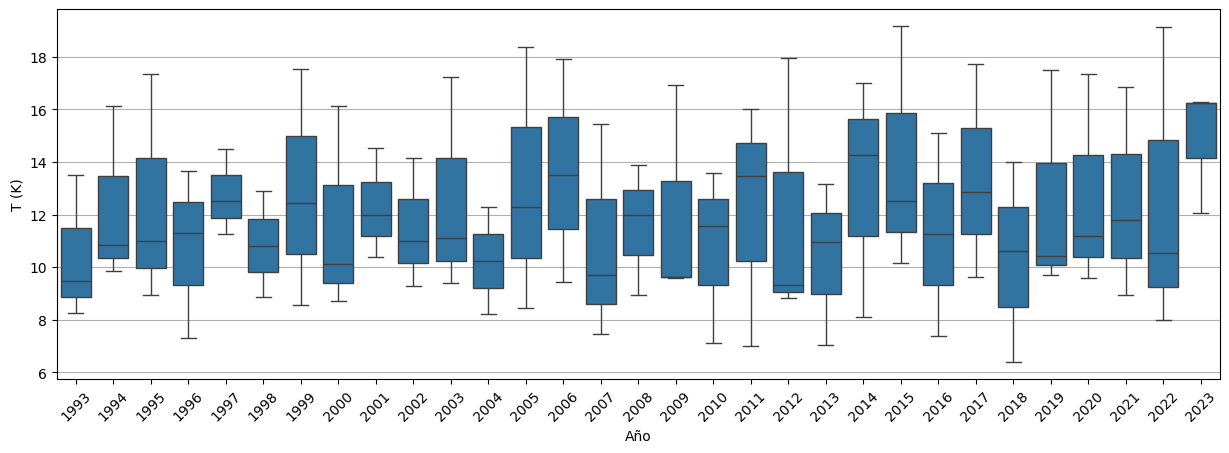

In [84]:
fig, ax = plt.subplots()

sbs.boxplot(data=primavera_30, x = 'Año', y = 'T10M')

ax.grid(True, which='major', axis='y')
#ax.set_ylim(276, 302)

ax.set(ylabel='T (K)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

'''plt.savefig('Boxplot primavera temperatura 30.pdf', format='pdf')
plt.savefig('Boxplot primavera temperatura 30.png', format='png')'''
plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\960702852.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


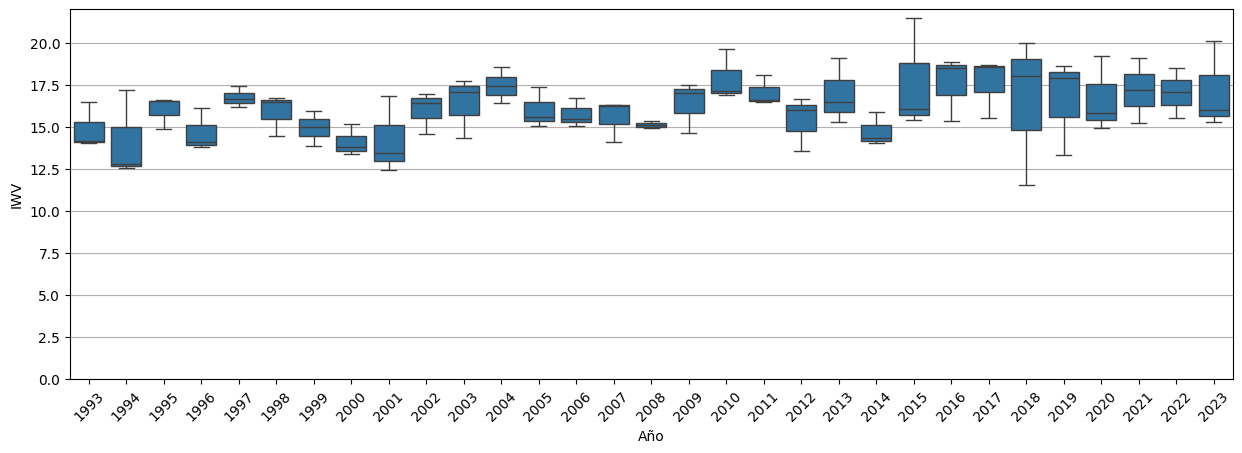

In [85]:
fig, ax = plt.subplots()

sbs.boxplot(data=verano_30, x = 'Año', y = 'TQV')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 22)

ax.set(ylabel='IWV')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

'''plt.savefig('Boxplot verano vapor de agua 30.pdf', format='pdf')
plt.savefig('Boxplot verano vapor de agua 30.png', format='png')'''
plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\2618493324.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


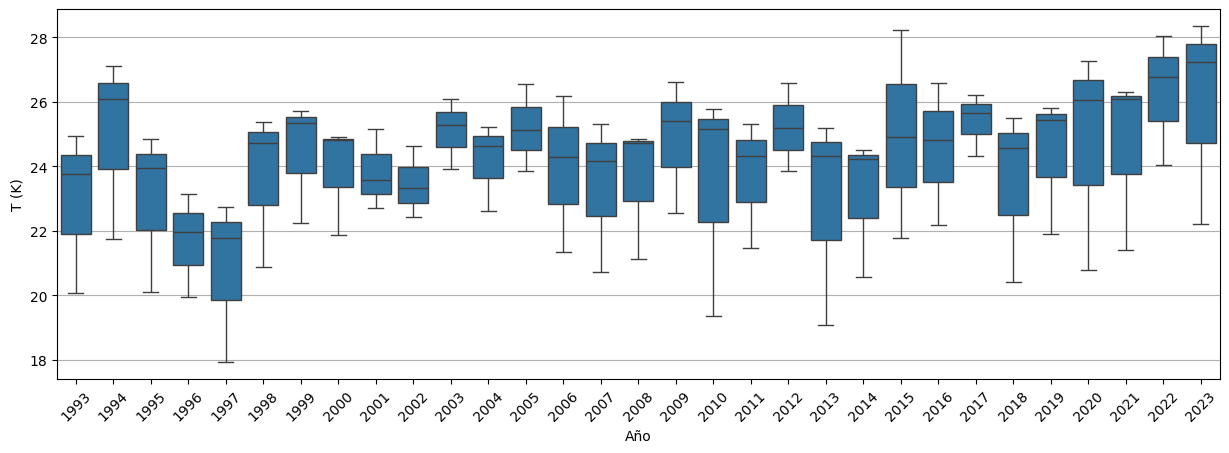

In [86]:
fig, ax = plt.subplots()

sbs.boxplot(data=verano_30, x = 'Año', y = 'T10M')

ax.grid(True, which='major', axis='y')
#ax.set_ylim(276, 302)

ax.set(ylabel='T (K)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

'''plt.savefig('Boxplot verano temperatura 30.pdf', format='pdf')
plt.savefig('Boxplot verano temperatura 30.png', format='png')'''
plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\612766450.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


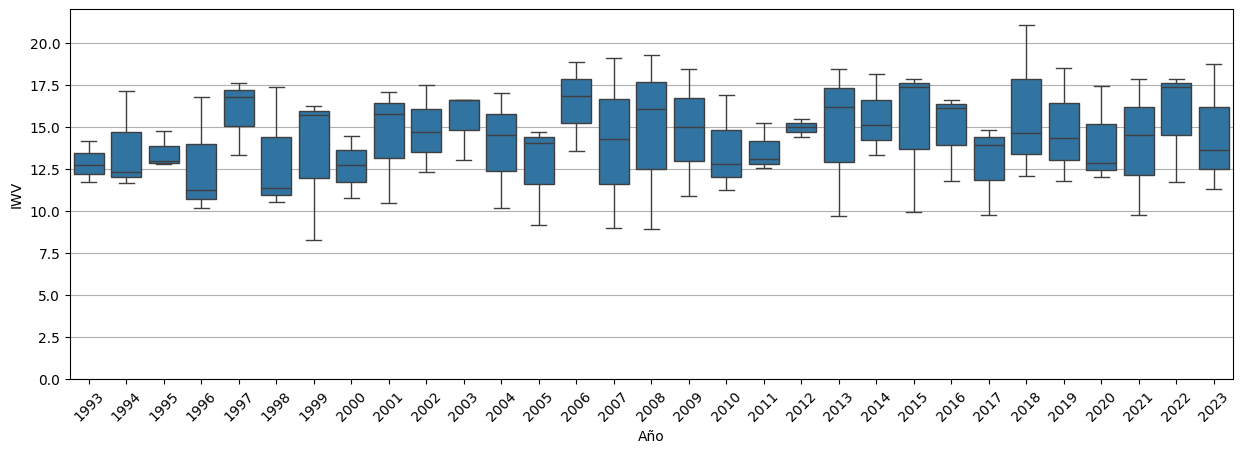

In [87]:
fig, ax = plt.subplots()

sbs.boxplot(data=otono_30, x = 'Año', y = 'TQV')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 22)

ax.set(ylabel='IWV')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

'''plt.savefig('Boxplot otono vapor de agua 30.pdf', format='pdf')
plt.savefig('Boxplot otono vapor de agua 30.png', format='png')'''
plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\117961386.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


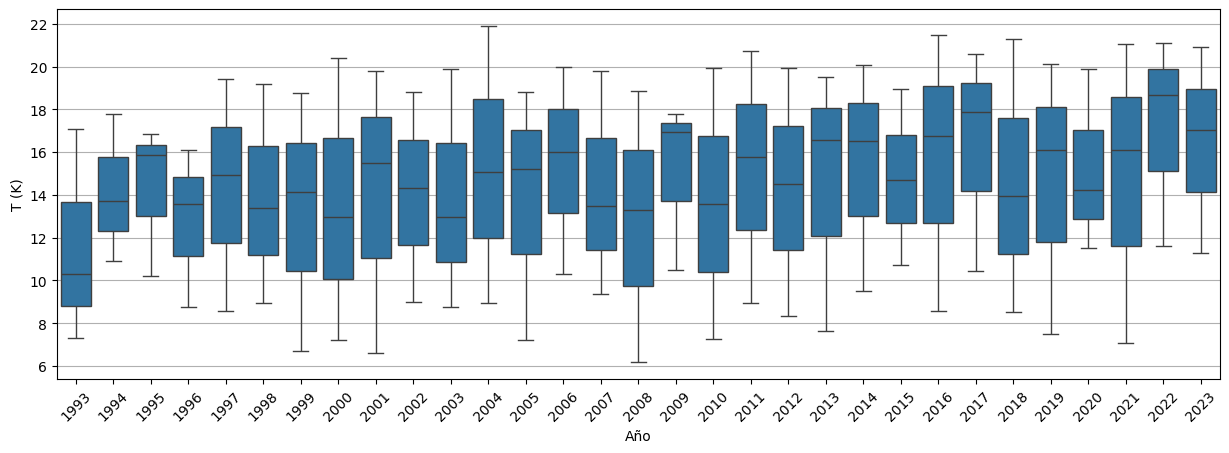

In [88]:
fig, ax = plt.subplots()

sbs.boxplot(data=otono_30, x = 'Año', y = 'T10M')

ax.grid(True, which='major', axis='y')
#ax.set_ylim(276, 302)

ax.set(ylabel='T (K)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

'''plt.savefig('Boxplot otono temperatura 30.pdf', format='pdf')
plt.savefig('Boxplot otono temperatura 30.png', format='png')'''
plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\3156817196.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


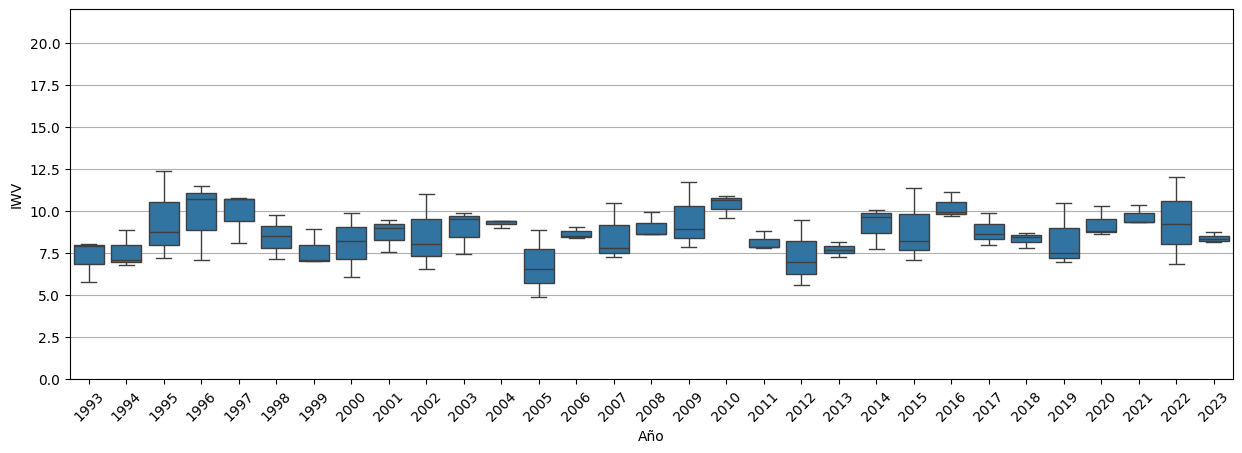

In [89]:
fig, ax = plt.subplots()

sbs.boxplot(data=invierno_30, x = 'Año', y = 'TQV')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 22)

ax.set(ylabel='IWV')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

'''plt.savefig('Boxplot invierno vapor de agua 30.pdf', format='pdf')
plt.savefig('Boxplot invierno vapor de agua 30.png', format='png')'''
plt.show()

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\2815142646.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


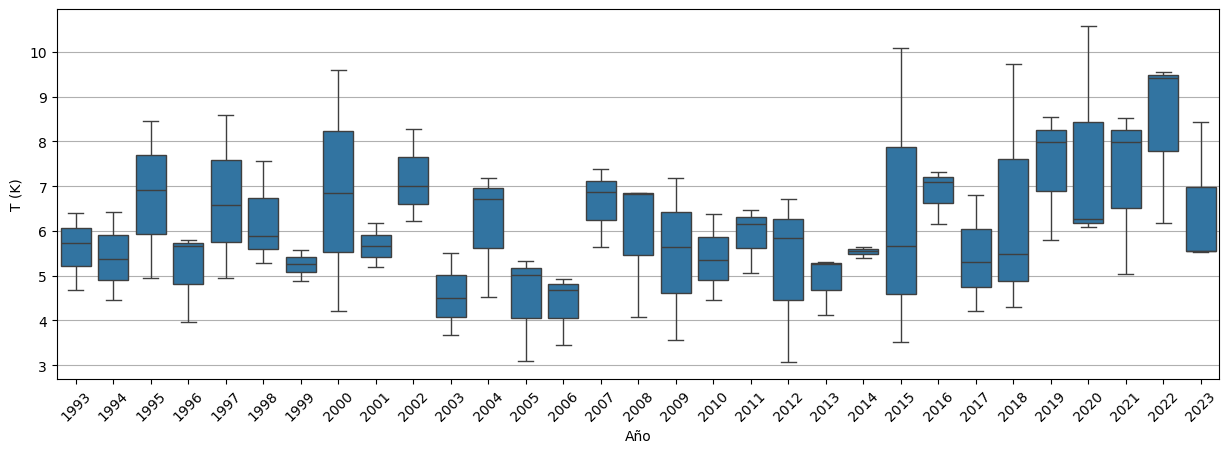

In [90]:
fig, ax = plt.subplots()

sbs.boxplot(data=invierno_30, x = 'Año', y = 'T10M')

ax.grid(True, which='major', axis='y')
#ax.set_ylim(276, 302)

ax.set(ylabel='T (K)')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

fig.set_figwidth(15)

'''plt.savefig('Boxplot invierno temperatura 30.pdf', format='pdf')
plt.savefig('Boxplot invierno temperatura 30.png', format='png')'''
plt.show()

Ahora en función de los meses

Primero últimos 40 años

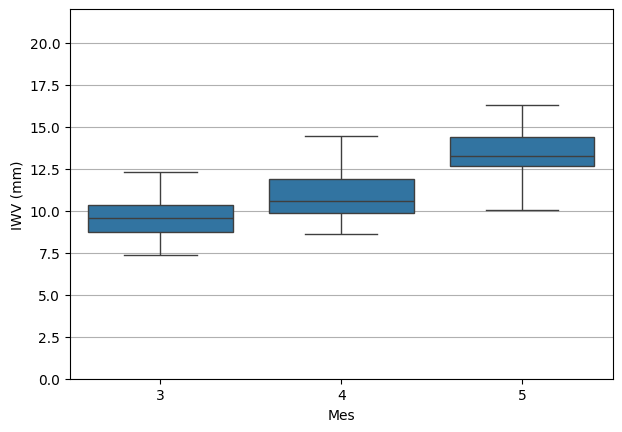

In [91]:
fig, ax = plt.subplots()

sbs.boxplot(data=primavera_40, x = 'Mes', y = 'TQV')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 22)

ax.set(ylabel='IWV (mm)')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

'''plt.savefig('Boxplot meses de primavera vapor de agua 40.pdf', format='pdf')
plt.savefig('Boxplot meses de primavera vapor de agua 40.png', format='png')'''
plt.show()

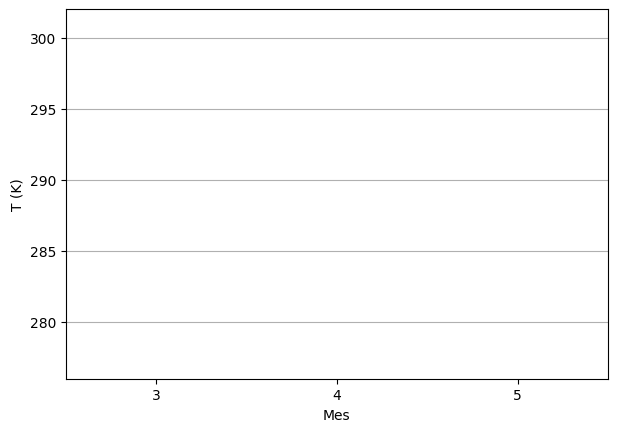

In [92]:
fig, ax = plt.subplots()

sbs.boxplot(data=primavera_40, x = 'Mes', y = 'T10M')

ax.grid(True, which='major', axis='y')
ax.set_ylim(276, 302)

ax.set(ylabel='T (K)')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

'''plt.savefig('Boxplot meses de primavera temperatura 40.pdf', format='pdf')
plt.savefig('Boxplot meses de primavera temperatura 40.png', format='png')'''
plt.show()

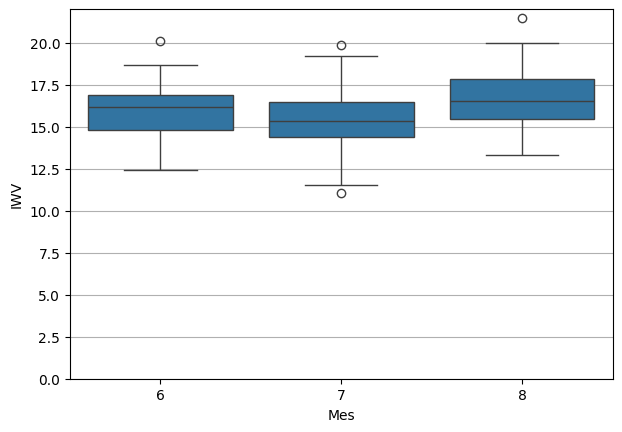

In [93]:
fig, ax = plt.subplots()

sbs.boxplot(data=verano_40, x = 'Mes', y = 'TQV')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 22)

ax.set(ylabel='IWV')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

'''plt.savefig('Boxplot meses de verano vapor de agua 40.pdf', format='pdf')
plt.savefig('Boxplot meses de verano vapor de agua 40.png', format='png')'''
plt.show()

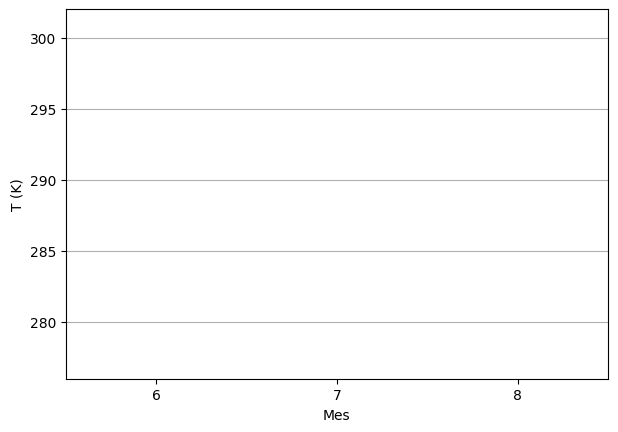

In [94]:
fig, ax = plt.subplots()

sbs.boxplot(data=verano_40, x = 'Mes', y = 'T10M')

ax.grid(True, which='major', axis='y')
ax.set_ylim(276, 302)

ax.set(ylabel='T (K)')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

'''plt.savefig('Boxplot meses de verano temperatura 40.pdf', format='pdf')
plt.savefig('Boxplot meses de verano temperatura 40.png', format='png')'''
plt.show()

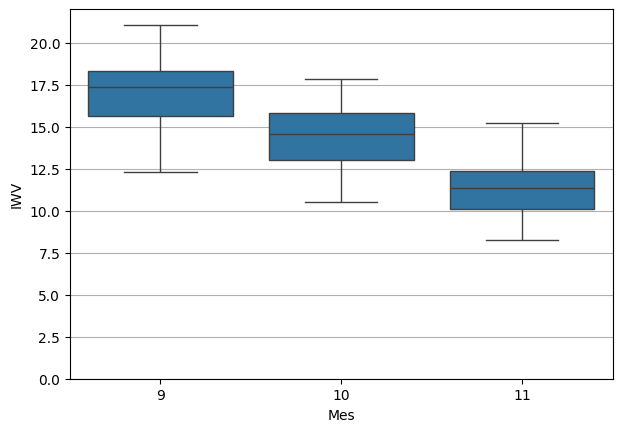

In [95]:
fig, ax = plt.subplots()

sbs.boxplot(data=otono_40, x = 'Mes', y = 'TQV')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 22)

ax.set(ylabel='IWV')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

'''plt.savefig('Boxplot meses de otono vapor de agua 40.pdf', format='pdf')
plt.savefig('Boxplot meses de otono vapor de agua 40.png', format='png')'''
plt.show()

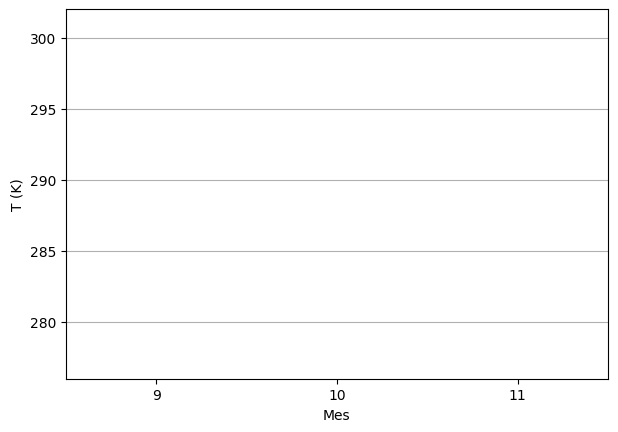

In [96]:
fig, ax = plt.subplots()

sbs.boxplot(data=otono_40, x = 'Mes', y = 'T10M')

ax.grid(True, which='major', axis='y')
ax.set_ylim(276, 302)

ax.set(ylabel='T (K)')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

'''plt.savefig('Boxplot meses de otono temperatura 40.pdf', format='pdf')
plt.savefig('Boxplot meses de otono temperatura 40.png', format='png')'''
plt.show()

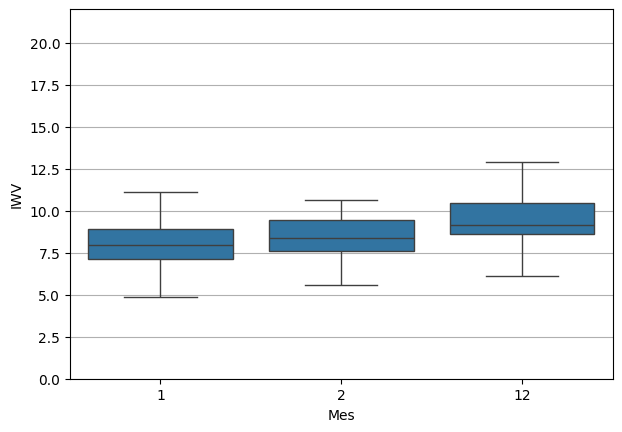

In [97]:
fig, ax = plt.subplots()

sbs.boxplot(data=invierno_40, x = 'Mes', y = 'TQV')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 22)

ax.set(ylabel='IWV')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

'''plt.savefig('Boxplot meses de invierno vapor de agua 40.pdf', format='pdf')
plt.savefig('Boxplot meses de invierno vapor de agua 40.png', format='png')'''
plt.show()

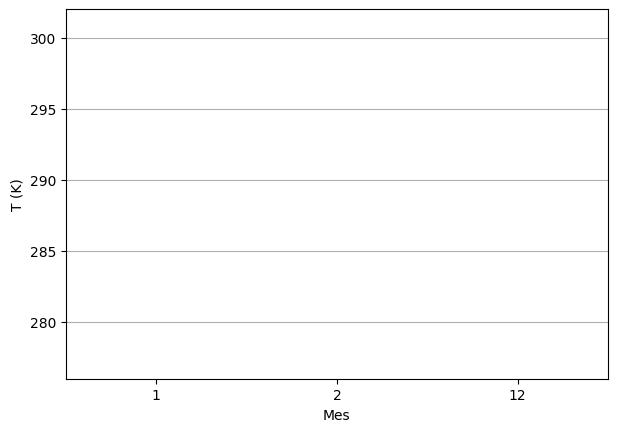

In [98]:
fig, ax = plt.subplots()

sbs.boxplot(data=invierno_40, x = 'Mes', y = 'T10M')

ax.grid(True, which='major', axis='y')
ax.set_ylim(276, 302)

ax.set(ylabel='T (K)')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

'''plt.savefig('Boxplot meses de invierno temperatura 40.pdf', format='pdf')
plt.savefig('Boxplot meses de invierno temperatura 40.png', format='png')'''
plt.show()

Ahora últimos 30 años

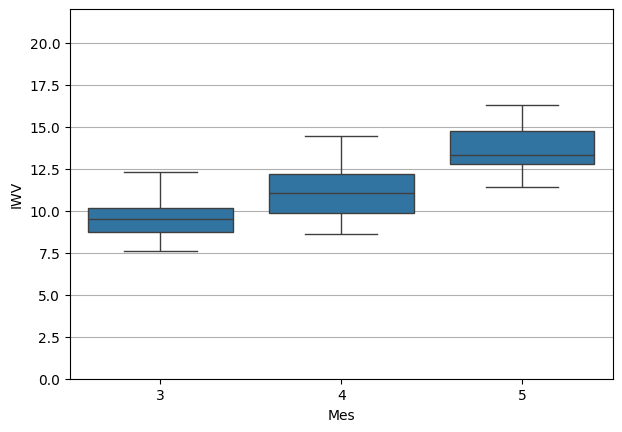

In [99]:
fig, ax = plt.subplots()

sbs.boxplot(data=primavera_30, x = 'Mes', y = 'TQV')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 22)

ax.set(ylabel='IWV')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

'''plt.savefig('Boxplot meses de primavera vapor de agua 30.pdf', format='pdf')
plt.savefig('Boxplot meses de primavera vapor de agua 30.png', format='png')'''
plt.show()

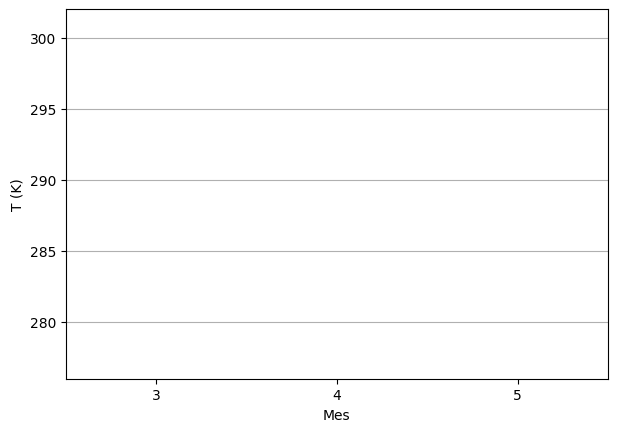

In [100]:
fig, ax = plt.subplots()

sbs.boxplot(data=primavera_30, x = 'Mes', y = 'T10M')

ax.grid(True, which='major', axis='y')
ax.set_ylim(276, 302)

ax.set(ylabel='T (K)')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

'''plt.savefig('Boxplot meses de primavera temperatura 30.pdf', format='pdf')
plt.savefig('Boxplot meses de primavera temperatura 30.png', format='png')'''
plt.show()

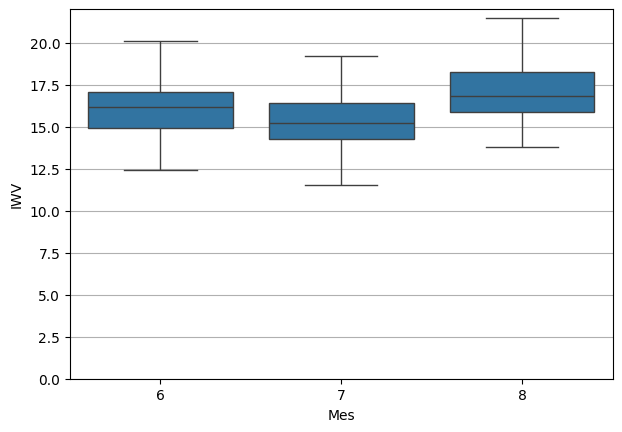

In [101]:
fig, ax = plt.subplots()

sbs.boxplot(data=verano_30, x = 'Mes', y = 'TQV')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 22)

ax.set(ylabel='IWV')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

'''plt.savefig('Boxplot meses de verano vapor de agua 30.pdf', format='pdf')
plt.savefig('Boxplot meses de verano vapor de agua 30.png', format='png')'''
plt.show()

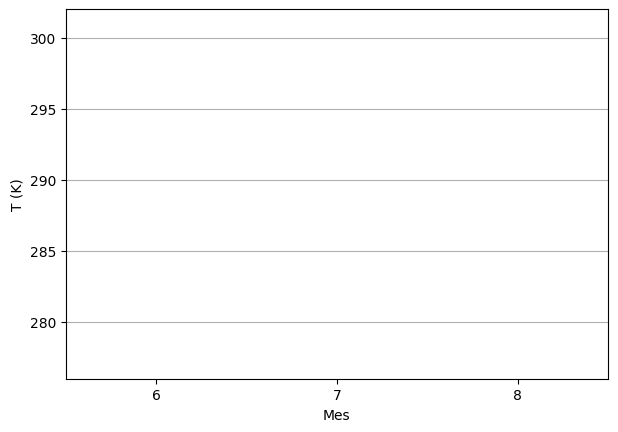

In [102]:
fig, ax = plt.subplots()

sbs.boxplot(data=verano_30, x = 'Mes', y = 'T10M')

ax.grid(True, which='major', axis='y')
ax.set_ylim(276, 302)

ax.set(ylabel='T (K)')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

'''plt.savefig('Boxplot meses de verano temperatura 30.pdf', format='pdf')
plt.savefig('Boxplot meses de verano temperatura 30.png', format='png')'''
plt.show()

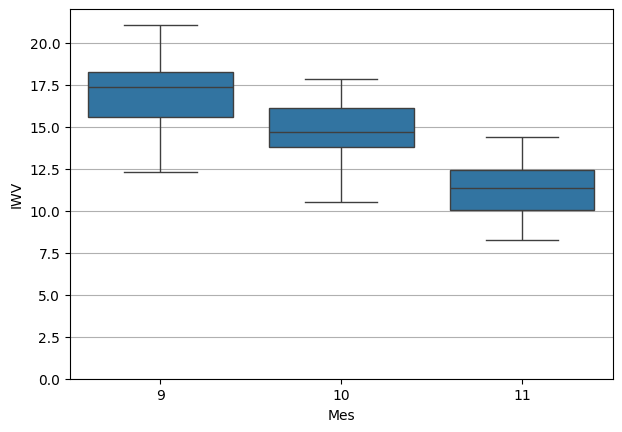

In [103]:
fig, ax = plt.subplots()

sbs.boxplot(data=otono_30, x = 'Mes', y = 'TQV')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 22)

ax.set(ylabel='IWV')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

'''plt.savefig('Boxplot meses de otono vapor de agua 30.pdf', format='pdf')
plt.savefig('Boxplot meses de otono vapor de agua 30.png', format='png')'''
plt.show()

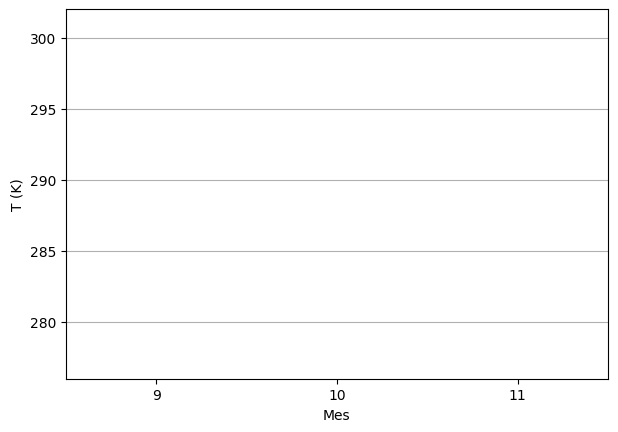

In [104]:
fig, ax = plt.subplots()

sbs.boxplot(data=otono_30, x = 'Mes', y = 'T10M')

ax.grid(True, which='major', axis='y')
ax.set_ylim(276, 302)

ax.set(ylabel='T (K)')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

'''plt.savefig('Boxplot meses de otono temperatura 30.pdf', format='pdf')
plt.savefig('Boxplot meses de otono temperatura 30.png', format='png')'''
plt.show()

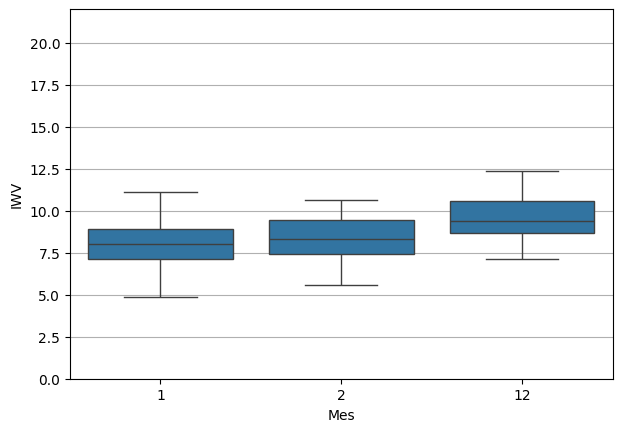

In [105]:
fig, ax = plt.subplots()

sbs.boxplot(data=invierno_30, x = 'Mes', y = 'TQV')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 22)

ax.set(ylabel='IWV')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

'''plt.savefig('Boxplot meses de invierno vapor de agua 30.pdf', format='pdf')
plt.savefig('Boxplot meses de invierno vapor de agua 30.png', format='png')'''
plt.show()

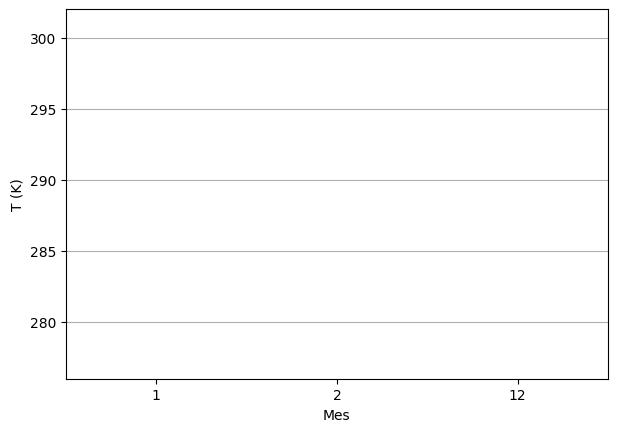

In [106]:
fig, ax = plt.subplots()

sbs.boxplot(data=invierno_30, x = 'Mes', y = 'T10M')

ax.grid(True, which='major', axis='y')
ax.set_ylim(276, 302)

ax.set(ylabel='T (K)')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

'''plt.savefig('Boxplot meses de invierno temperatura 30.pdf', format='pdf')
plt.savefig('Boxplot meses de invierno temperatura 30.png', format='png')'''
plt.show()

Realizo ahora un boxplot con las evoluciones de primavera, verano, otoño e invierno de los 40 años

In [107]:
primavera_40['Location'] = 'Primavera'
verano_40['Location'] = 'Verano'
otono_40['Location'] = 'Otoño'
invierno_40['Location'] = 'Invierno'

C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\1253982544.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  primavera_40['Location'] = 'Primavera'
C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\1253982544.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  verano_40['Location'] = 'Verano'
C:\Users\Raul\AppData\Local\Temp\ipykernel_10648\1253982544.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

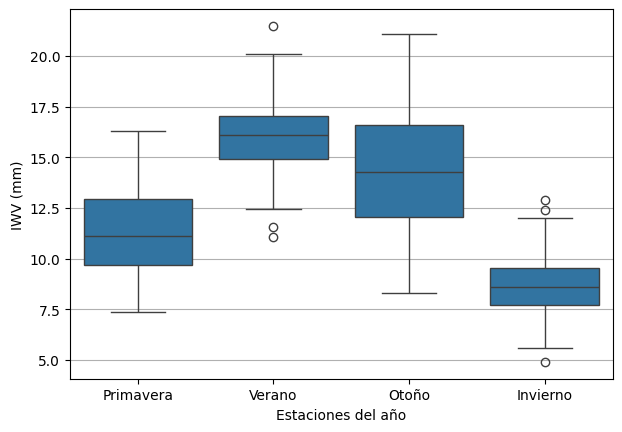

In [108]:
cdf = pd.concat([primavera_40, verano_40, otono_40, invierno_40])

fig, ax = plt.subplots()

sbs.boxplot(data=cdf, x = 'Location', y = 'TQV')

ax.grid(True, which='major', axis='y')
#ax.set_ylim(276, 302)

ax.set(ylabel='IWV (mm)', xlabel='Estaciones del año')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

plt.savefig('Boxplot vapor de agua en las estaciones 40.pdf', format='pdf')
plt.savefig('Boxplot vapor de agua en las estaciones 40.png', format='png')
plt.show()

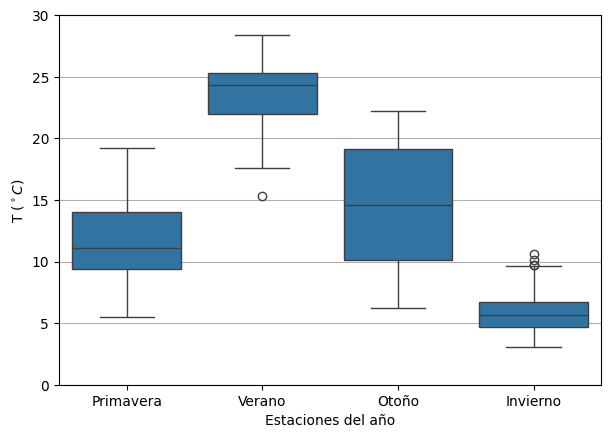

In [109]:
fig, ax = plt.subplots()

sbs.boxplot(data=cdf, x = 'Location', y = 'T10M')

ax.grid(True, which='major', axis='y')
ax.set_ylim(0, 30)

ax.set(ylabel=r'T ($^\circ C$)', xlabel='Estaciones del año')
#ax.set_xticklabels(f_30['Año'], rotation=45)

fig.set_figwidth(7)

plt.savefig('Boxplot temperatura en las estaciones 40.pdf', format='pdf')
plt.savefig('Boxplot temperatura en las estaciones 40.png', format='png')
plt.show()